# Obtain

In [1]:
## Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
## Set options for displaying Pandas DataFrames
pd.options.display.max_columns = 100
pd.options.display.max_rows = 120

In [3]:
## Load in voter registration data for Union County
uc_vreg = pd.read_table('Data/ncvoter90.zip', encoding='ISO-8859-1')
uc_vreg.head()

county_id county_desc  voter_reg_num status_cd voter_status_desc reason_cd  \
0         90       UNION         346446         A            ACTIVE        AV   
1         90       UNION         348004         A            ACTIVE        AV   
2         90       UNION         281016         A            ACTIVE        AV   
3         90       UNION         288489         A            ACTIVE        AV   
4         90       UNION         279308         A            ACTIVE        AV   

  voter_status_reason_desc absent_ind name_prefx_cd last_name first_name  \
0                 VERIFIED                             AALAEI       ARIO   
1                 VERIFIED                             AALAEI    KAVITHA   
2                 VERIFIED                            AALBORG     ALEXIS   
3                 VERIFIED                            AALBORG      BRYAN   
4                 VERIFIED                            AALBORG     SHARON   

    middle_name name_suffix_lbl         res_street_address res_city_desc  \
0           NaN             NaN   4009  MILLBRIDGE PKWY           WAXHAW   
1           NaN             NaN   4009  MILLBRIDGE PKWY           WAXHAW   
2         LEANN             NaN  1001  STEVENS PRIDE CT     INDIAN TRAIL   
3           LEE             NaN  1001  STEVENS PRIDE CT     INDIAN TRAIL   
4  SCHLEENBAKER             NaN  1001  STEVENS PRIDE CT     INDIAN TRAIL   

  state_cd  zip_code             mail_addr1 mail_addr2 mail_addr3 mail_addr4  \
0       NC   28173.0   4009 MILLBRIDGE PKWY        NaN        NaN        NaN   
1       NC   28173.0   4009 MILLBRIDGE PKWY        NaN        NaN        NaN   
2       NC   28079.0  1001 STEVENS PRIDE CT        NaN        NaN        NaN   
3       NC   28079.0  1001 STEVENS PRIDE CT        NaN        NaN        NaN   
4       NC   28079.0  1001 STEVENS PRIDE CT        NaN        NaN        NaN   

      mail_city mail_state mail_zipcode  full_phone_number race_code  \
0        WAXHAW         NC        28173                NaN         W   
1        WAXHAW         NC        28173                NaN         A   
2  INDIAN TRAIL         NC        28079                NaN         W   
3  INDIAN TRAIL         NC        28079                NaN         W   
4  INDIAN TRAIL         NC        28079                NaN         W   

  ethnic_code party_cd gender_code  birth_age birth_state drivers_lic  \
0          NL      UNA           M         46          OC           Y   
1          NL      DEM           F         46          OC           Y   
2          NL      UNA           F         26          IA           Y   
3          UN      UNA           M         62          OK           Y   
4          NL      REP           F         62          PA           Y   

   registr_dt precinct_abbrv precinct_desc  municipality_abbrv  \
0  04/25/2019           020A          020A                 5.0   
1  06/24/2019           020A          020A                 5.0   
2  11/04/2013           029A          029A                 6.0   
3  09/17/2014           029A          029A                 6.0   
4  07/24/2013           029A          029A                 6.0   

  municipality_desc  ward_abbrv  ward_desc  cong_dist_abbrv super_court_abbrv  \
0            WAXHAW         NaN        NaN              9.0               20B   
1            WAXHAW         NaN        NaN              9.0               20B   
2      INDIAN TRAIL         NaN        NaN              9.0               20B   
3      INDIAN TRAIL         NaN        NaN              9.0               20B   
4      INDIAN TRAIL         NaN        NaN              9.0               20B   

  judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  county_commiss_abbrv  \
0              20C             35.0            68.0                   NaN   
1              20C             35.0            68.0                   NaN   
2              20C             35.0            68.0                   NaN   
3              20C             35.0            68.0      

In [4]:
## Load in voter history data for Union County
uc_vhis = pd.read_table('Data/ncvhis90.zip')
uc_vhis.head()

county_id county_desc  voter_reg_num election_lbl       election_desc  \
0         90       UNION         285297   11/06/2018  11/06/2018 GENERAL   
1         90       UNION         285297   11/03/2020  11/03/2020 GENERAL   
2         90       UNION         285297   11/08/2016  11/08/2016 GENERAL   
3         90       UNION         285297   09/10/2019  09/10/2019 GENERAL   
4         90       UNION         285297   03/03/2020  03/03/2020 PRIMARY   

      voting_method voted_party_cd voted_party_desc pct_label pct_description  \
0  ABSENTEE ONESTOP            REP       REPUBLICAN       016             016   
1  ABSENTEE ONESTOP            REP       REPUBLICAN       016             016   
2  ABSENTEE ONESTOP            REP       REPUBLICAN       016             016   
3  ABSENTEE ONESTOP            REP       REPUBLICAN       016             016   
4         IN-PERSON            REP       REPUBLICAN       016             016   

       ncid  voted_county_id voted_county_desc vtd_label vtd_description  
0  AA100547               90             UNION       016             016  
1  AA100547               90             UNION       016             016  
2  AA100547               90             UNION       016             016  
3  AA100547               90             UNION       016             016  
4  AA100547               90             UNION       016             016

# Scrub and Explore (Part I)

In [5]:
## Check metadata for voter registration dataframe
uc_vreg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183969 entries, 0 to 183968
Data columns (total 71 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   county_id                 183969 non-null  int64  
 1   county_desc               183969 non-null  object 
 2   voter_reg_num             183969 non-null  int64  
 3   status_cd                 183969 non-null  object 
 4   voter_status_desc         183969 non-null  object 
 5   reason_cd                 183969 non-null  object 
 6   voter_status_reason_desc  183969 non-null  object 
 7   absent_ind                183969 non-null  object 
 8   name_prefx_cd             183969 non-null  object 
 9   last_name                 183965 non-null  object 
 10  first_name                183967 non-null  object 
 11  middle_name               168871 non-null  object 
 12  name_suffix_lbl           20984 non-null   object 
 13  res_street_address        183969 non-null  o

In [6]:
## Check metadata for voter history dataframe
uc_vhis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806996 entries, 0 to 806995
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   county_id          806996 non-null  int64 
 1   county_desc        806996 non-null  object
 2   voter_reg_num      806996 non-null  int64 
 3   election_lbl       806996 non-null  object
 4   election_desc      806996 non-null  object
 5   voting_method      806996 non-null  object
 6   voted_party_cd     806932 non-null  object
 7   voted_party_desc   806932 non-null  object
 8   pct_label          806996 non-null  object
 9   pct_description    806996 non-null  object
 10  ncid               806996 non-null  object
 11  voted_county_id    806996 non-null  int64 
 12  voted_county_desc  806996 non-null  object
 13  vtd_label          806828 non-null  object
 14  vtd_description    806828 non-null  object
dtypes: int64(3), object(12)
memory usage: 92.4+ MB


In [7]:
## Check for duplicate entries in voter registration data
uc_vreg.duplicated().sum()

0

In [8]:
## Check for duplicate entries in voter history data
uc_vhis.duplicated().sum()

132

In [9]:
## Inspect duplicate entries in voter history data
uc_vhis.loc[uc_vhis.duplicated()]

county_id county_desc  voter_reg_num election_lbl       election_desc  \
9023           90       UNION         325228   03/03/2020  03/03/2020 PRIMARY   
9025           90       UNION         325228   09/10/2019  09/10/2019 GENERAL   
26366          90       UNION         205258   11/06/2012  11/06/2012 GENERAL   
35914          90       UNION         338757   11/06/2018  11/06/2018 GENERAL   
74971          90       UNION         204911   11/06/2012  11/06/2012 GENERAL   
...           ...         ...            ...          ...                 ...   
746626         90       UNION          10836   11/08/2016  11/08/2016 GENERAL   
767799         90       UNION         338953   11/06/2018  11/06/2018 GENERAL   
768673         90       UNION         167702   05/08/2012  05/08/2012 PRIMARY   
773146         90       UNION         271801   11/06/2012  11/06/2012 GENERAL   
782229         90       UNION         172038   11/06/2012  11/06/2012 GENERAL   

           voting_method voted_party_cd voted_party_desc pct_label  \
9023    ABSENTEE ONESTOP            DEM       DEMOCRATIC      020A   
9025           IN-PERSON            DEM       DEMOCRATIC      020A   
26366   ABSENTEE ONESTOP            UNA     UNAFFILIATED      029C   
35914        PROVISIONAL            REP       REPUBLICAN      037A   
74971   ABSENTEE ONESTOP            DEM       DEMOCRATIC       036   
...                  ...            ...              ...       ...   
746626  ABSENTEE ONESTOP            REP       REPUBLICAN       024   
767799       PROVISIONAL            UNA     UNAFFILIATED       012   
768673         IN-PERSON            REP       REPUBLICAN       036   
773146  ABSENTEE ONESTOP            REP       REPUBLICAN       042   
782229         IN-PERSON            UNA     UNAFFILIATED       013   

       pct_description       ncid  voted_county_id voted_county_desc  \
9023              020A   AN168178               90             UNION   
9025              020A   AN168178               90             UNION   
26366             029C    CE19807               90             UNION   
35914             037A  CW1070559               90             UNION   
74971              036   CW455149               90             UNION   
...                ...        ...              ...               ...   
746626             024     EF8430               90             UNION   
767799             012    EF90843               90             UNION   
768673             036    EF91060               90             UNION   
773146             042    EF92439               90             UNION   
782229             013    EF95396               90             UNION   

       vtd_label vtd_description  
9023        020A            020A  
9025        020A            020A  
26366       029C            029C  
35914       037A            037A  
74971        036             036  
...          ...             ...  
746626       024             024  
767799       012             012  
768673       036             036  
773146       042             042  
782229       013             013  

[132 rows x 15 columns]

In [10]:
## Remove duplicate entries from records of voter history
uc_vhis.drop_duplicates(inplace=True)

## Merge Voter Registration Data with Voter History Data

In [11]:
## Merge voter registration information onto records of voter history based 
  ## on unique ncid
    
## Use right join so we're only including ncid's for which their is
  ## registration and demographic information, including for those 
    ## people who are registered, but have never voted
all_uc_voters = uc_vhis.merge(uc_vreg.drop(columns=['county_id', 'county_desc',
                                                'voter_reg_num'], axis=1),
                                       how='right', on='ncid')
# inspect new dataframe
display(all_uc_voters.head())
all_uc_voters.tail()

county_id county_desc  voter_reg_num election_lbl  \
0       90.0       UNION       346446.0   11/03/2020   
1       90.0       UNION       348004.0   11/03/2020   
2        NaN         NaN            NaN          NaN   
3       90.0       UNION       288489.0   11/08/2011   
4       90.0       UNION       288489.0   11/06/2012   

                  election_desc     voting_method voted_party_cd  \
0            11/03/2020 GENERAL  ABSENTEE ONESTOP            UNA   
1            11/03/2020 GENERAL  ABSENTEE ONESTOP            DEM   
2                           NaN               NaN            NaN   
3  11/08/2011 MUNICIPAL GENERAL         IN-PERSON            UNA   
4            11/06/2012 GENERAL  ABSENTEE ONESTOP            UNA   

  voted_party_desc pct_label pct_description      ncid  voted_county_id  \
0     UNAFFILIATED      020A            020A  EF230133             90.0   
1       DEMOCRATIC      020A            020A  EF231096             90.0   
2              NaN       NaN             NaN  AL261840              NaN   
3     UNAFFILIATED      26.1            26.1  AL178177             11.0   
4     UNAFFILIATED      26.1            26.1  AL178177             11.0   

  voted_county_desc vtd_label vtd_description status_cd voter_status_desc  \
0             UNION      020A            020A         A            ACTIVE   
1             UNION      020A            020A         A            ACTIVE   
2               NaN       NaN             NaN         A            ACTIVE   
3          BUNCOMBE      26.1            26.1         A            ACTIVE   
4          BUNCOMBE      26.1            26.1         A            ACTIVE   

  reason_cd voter_status_reason_desc absent_ind name_prefx_cd last_name  \
0        AV                 VERIFIED                             AALAEI   
1        AV                 VERIFIED                             AALAEI   
2        AV                 VERIFIED                            AALBORG   
3        AV                 VERIFIED                            AALBORG   
4        AV                 VERIFIED                            AALBORG   

  first_name middle_name name_suffix_lbl         res_street_address  \
0       ARIO         NaN             NaN   4009  MILLBRIDGE PKWY      
1    KAVITHA         NaN             NaN   4009  MILLBRIDGE PKWY      
2     ALEXIS       LEANN             NaN  1001  STEVENS PRIDE CT      
3      BRYAN         LEE             NaN  1001  STEVENS PRIDE CT      
4      BRYAN         LEE             NaN  1001  STEVENS PRIDE CT      

  res_city_desc state_cd  zip_code             mail_addr1 mail_addr2  \
0        WAXHAW       NC   28173.0   4009 MILLBRIDGE PKWY        NaN   
1        WAXHAW       NC   28173.0   4009 MILLBRIDGE PKWY        NaN   
2  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   
3  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   
4  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   

  mail_addr3 mail_addr4     mail_city mail_state mail_zipcode  \
0        NaN        NaN        WAXHAW         NC        28173   
1        NaN        NaN        WAXHAW         NC        28173   
2        NaN        NaN  INDIAN TRAIL         NC        28079   
3        NaN        NaN  INDIAN TRAIL         NC        28079   
4        NaN        NaN  INDIAN TRAIL         NC        28079   

   full_phone_number race_code ethnic_code party_cd gender_code  birth_age  \
0                NaN         W          NL      UNA           M         46   
1                NaN         A          NL      DEM           F         46   
2                NaN         W          NL      UNA           F         26   
3                NaN         W          UN      UNA           M         62   
4                NaN         W          UN      UNA           M         62   

  birth_state drivers_lic  registr_dt precinct_abbrv precinct_desc  \
0          OC           Y  04/25/2019           020A          020A   
1          OC           Y  06/24

county_id county_desc  voter_reg_num election_lbl       election_desc  \
825812       90.0       UNION       243464.0   11/06/2018  11/06/2018 GENERAL   
825813       90.0       UNION       243464.0   11/03/2020  11/03/2020 GENERAL   
825814       90.0       UNION       243464.0   05/08/2018  05/08/2018 PRIMARY   
825815       90.0       UNION       243464.0   09/10/2019  09/10/2019 GENERAL   
825816        NaN         NaN            NaN          NaN                 NaN   

           voting_method voted_party_cd voted_party_desc pct_label  \
825812  ABSENTEE ONESTOP            DEM       DEMOCRATIC       025   
825813  ABSENTEE ONESTOP            DEM       DEMOCRATIC       025   
825814  ABSENTEE ONESTOP            DEM       DEMOCRATIC       025   
825815  ABSENTEE ONESTOP            DEM       DEMOCRATIC       025   
825816               NaN            NaN              NaN       NaN   

       pct_description      ncid  voted_county_id voted_county_desc vtd_label  \
825812             025  EF157599             90.0             UNION       025   
825813             025  EF157599             90.0             UNION       025   
825814             025  EF157599             90.0             UNION       025   
825815             025  EF157599             90.0             UNION       025   
825816             NaN  EF219265              NaN               NaN       NaN   

       vtd_description status_cd voter_status_desc reason_cd  \
825812             025         A            ACTIVE        AV   
825813             025         A            ACTIVE        AV   
825814             025         A            ACTIVE        AV   
825815             025         A            ACTIVE        AV   
825816             NaN         I          INACTIVE        IU   

                   voter_status_reason_desc absent_ind name_prefx_cd  \
825812                             VERIFIED                            
825813                             VERIFIED                            
825814                             VERIFIED                            
825815                             VERIFIED                            
825816  CONFIRMATION RETURNED UNDELIVERABLE                            

       last_name first_name middle_name name_suffix_lbl  \
825812    ZYNSKY      JAMES      ROBERT             NaN   
825813    ZYNSKY      JAMES      ROBERT             NaN   
825814    ZYNSKY      JAMES      ROBERT             NaN   
825815    ZYNSKY      JAMES      ROBERT             NaN   
825816   ZYWICKI   JENNIFER         ANN             NaN   

           res_street_address res_city_desc state_cd  zip_code  \
825812     2905  MEDLIN RD           MONROE       NC   28112.0   
825813     2905  MEDLIN RD           MONROE       NC   28112.0   
825814     2905  MEDLIN RD           MONROE       NC   28112.0   
825815     2905  MEDLIN RD           MONROE       NC   28112.0   
825816  5719  PARKSTONE DR         MATTHEWS       NC   28104.0   

               mail_addr1 mail_addr2 mail_addr3 mail_addr4 mail_city  \
825812     2905 MEDLIN RD        NaN        NaN        NaN    MONROE   
825813     2905 MEDLIN RD        NaN        NaN        NaN    MONROE   
825814     2905 MEDLIN RD        NaN        NaN        NaN    MONROE   
825815     2905 MEDLIN RD        NaN        NaN        NaN    MONROE   
825816  5719 PARKSTONE DR        NaN        NaN        NaN  MATTHEWS   

       mail_state mail_zipcode  full_phone_number race_code ethnic_code  \
825812         NC        28112                NaN         W          NL   
825813         NC        28112                NaN         W          NL   
825814         NC        28112                NaN         W          NL   
825815         NC        28112                NaN         W          NL   
825816         NC        28104                NaN         W          NL   

       party_cd gender_code  birth_age birth_state drivers_lic  registr_dt  \
825812      DEM           M         68          MA           Y  08/28/2009   
825

In [12]:
## Check number of unique individuals represented in all records
all_uc_voters['ncid'].nunique()

183969

In [13]:
## Check voter status information -- Should any categories be removed??
all_uc_voters['voter_status_desc'].value_counts()

ACTIVE       761412
REMOVED       39285
INACTIVE      23528
DENIED         1354
TEMPORARY       238
Name: voter_status_desc, dtype: int64

### Active Voters

In [14]:
active_voters = all_uc_voters.groupby('voter_status_desc').get_group('ACTIVE')
print(len(active_voters))
active_voters.head()

761412


county_id county_desc  voter_reg_num election_lbl  \
0       90.0       UNION       346446.0   11/03/2020   
1       90.0       UNION       348004.0   11/03/2020   
2        NaN         NaN            NaN          NaN   
3       90.0       UNION       288489.0   11/08/2011   
4       90.0       UNION       288489.0   11/06/2012   

                  election_desc     voting_method voted_party_cd  \
0            11/03/2020 GENERAL  ABSENTEE ONESTOP            UNA   
1            11/03/2020 GENERAL  ABSENTEE ONESTOP            DEM   
2                           NaN               NaN            NaN   
3  11/08/2011 MUNICIPAL GENERAL         IN-PERSON            UNA   
4            11/06/2012 GENERAL  ABSENTEE ONESTOP            UNA   

  voted_party_desc pct_label pct_description      ncid  voted_county_id  \
0     UNAFFILIATED      020A            020A  EF230133             90.0   
1       DEMOCRATIC      020A            020A  EF231096             90.0   
2              NaN       NaN             NaN  AL261840              NaN   
3     UNAFFILIATED      26.1            26.1  AL178177             11.0   
4     UNAFFILIATED      26.1            26.1  AL178177             11.0   

  voted_county_desc vtd_label vtd_description status_cd voter_status_desc  \
0             UNION      020A            020A         A            ACTIVE   
1             UNION      020A            020A         A            ACTIVE   
2               NaN       NaN             NaN         A            ACTIVE   
3          BUNCOMBE      26.1            26.1         A            ACTIVE   
4          BUNCOMBE      26.1            26.1         A            ACTIVE   

  reason_cd voter_status_reason_desc absent_ind name_prefx_cd last_name  \
0        AV                 VERIFIED                             AALAEI   
1        AV                 VERIFIED                             AALAEI   
2        AV                 VERIFIED                            AALBORG   
3        AV                 VERIFIED                            AALBORG   
4        AV                 VERIFIED                            AALBORG   

  first_name middle_name name_suffix_lbl         res_street_address  \
0       ARIO         NaN             NaN   4009  MILLBRIDGE PKWY      
1    KAVITHA         NaN             NaN   4009  MILLBRIDGE PKWY      
2     ALEXIS       LEANN             NaN  1001  STEVENS PRIDE CT      
3      BRYAN         LEE             NaN  1001  STEVENS PRIDE CT      
4      BRYAN         LEE             NaN  1001  STEVENS PRIDE CT      

  res_city_desc state_cd  zip_code             mail_addr1 mail_addr2  \
0        WAXHAW       NC   28173.0   4009 MILLBRIDGE PKWY        NaN   
1        WAXHAW       NC   28173.0   4009 MILLBRIDGE PKWY        NaN   
2  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   
3  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   
4  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   

  mail_addr3 mail_addr4     mail_city mail_state mail_zipcode  \
0        NaN        NaN        WAXHAW         NC        28173   
1        NaN        NaN        WAXHAW         NC        28173   
2        NaN        NaN  INDIAN TRAIL         NC        28079   
3        NaN        NaN  INDIAN TRAIL         NC        28079   
4        NaN        NaN  INDIAN TRAIL         NC        28079   

   full_phone_number race_code ethnic_code party_cd gender_code  birth_age  \
0                NaN         W          NL      UNA           M         46   
1                NaN         A          NL      DEM           F         46   
2                NaN         W          NL      UNA           F         26   
3                NaN         W          UN      UNA           M         62   
4                NaN         W          UN      UNA           M         62   

  birth_state drivers_lic  registr_dt precinct_abbrv precinct_desc  \
0          OC           Y  04/25/2019           020A          020A   
1          OC           Y  06/24

In [15]:
active_voters['voter_status_reason_desc'].value_counts()

VERIFIED                               732430
LEGACY DATA                             22500
UNVERIFIED                               4905
UNVERIFIED NEW                           1101
VERIFICATION PENDING                      284
CONFIRMATION PENDING                       77
CONFIRMATION RETURNED UNDELIVERABLE        61
CONFIRMATION NOT RETURNED                  50
ARMED FORCES                                4
Name: voter_status_reason_desc, dtype: int64

(18.0, 110.0)

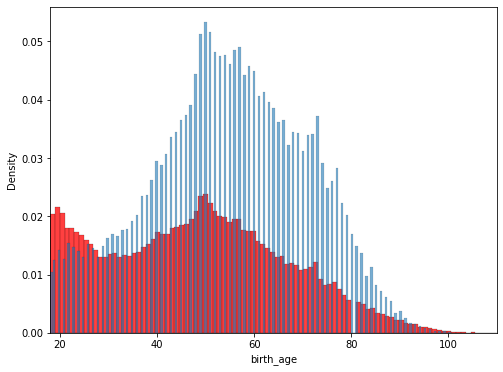

In [16]:
fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(uc_vreg['birth_age'], stat='density', color='r', ax=ax)
sns.histplot(active_voters['birth_age'], stat='density', alpha=0.6, ax=ax)
ax.set_xlim(18,110)

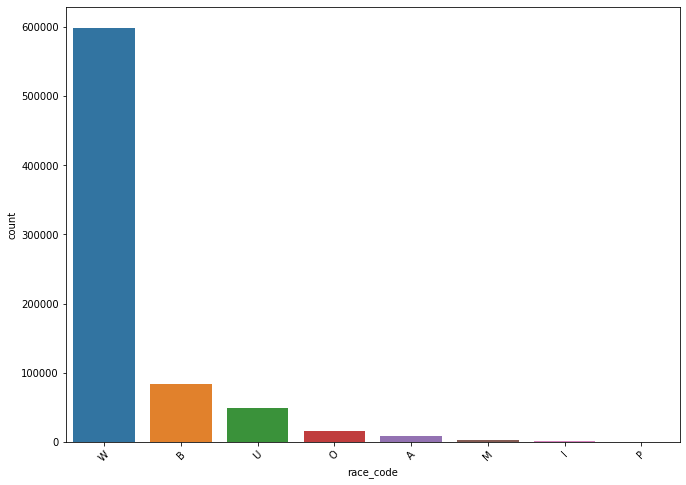

In [17]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='race_code', data=active_voters,
                   order=(active_voters['race_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

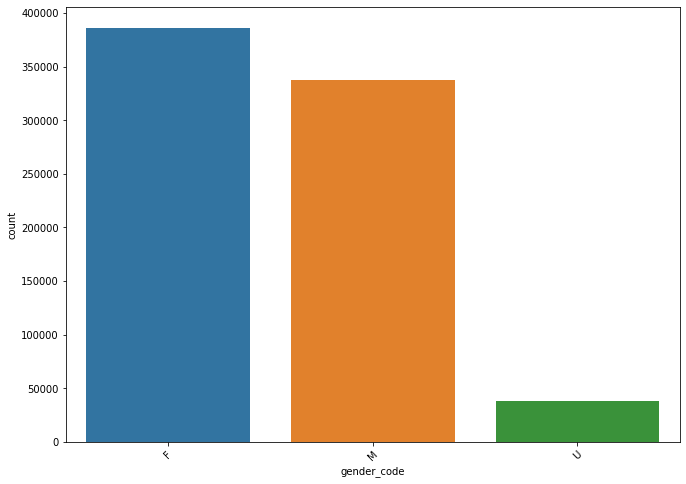

In [18]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='gender_code', data=active_voters,
                   order=(active_voters['gender_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

### Denied Voters

In [19]:
denied_voters = all_uc_voters.groupby('voter_status_desc').get_group('DENIED')
print(len(denied_voters))
denied_voters.head()

1354


county_id county_desc  voter_reg_num election_lbl election_desc  \
504         NaN         NaN            NaN          NaN           NaN   
1358        NaN         NaN            NaN          NaN           NaN   
2132        NaN         NaN            NaN          NaN           NaN   
2373        NaN         NaN            NaN          NaN           NaN   
2413        NaN         NaN            NaN          NaN           NaN   

     voting_method voted_party_cd voted_party_desc pct_label pct_description  \
504            NaN            NaN              NaN       NaN             NaN   
1358           NaN            NaN              NaN       NaN             NaN   
2132           NaN            NaN              NaN       NaN             NaN   
2373           NaN            NaN              NaN       NaN             NaN   
2413           NaN            NaN              NaN       NaN             NaN   

          ncid  voted_county_id voted_county_desc vtd_label vtd_description  \
504   EF174501              NaN               NaN       NaN             NaN   
1358  EF242578              NaN               NaN       NaN             NaN   
2132  EF156089              NaN               NaN       NaN             NaN   
2373  EF122557              NaN               NaN       NaN             NaN   
2413  EF210300              NaN               NaN       NaN             NaN   

     status_cd voter_status_desc reason_cd  \
504          D            DENIED        DU   
1358         D            DENIED        DU   
2132         D            DENIED        DU   
2373         D            DENIED        DU   
2413         D            DENIED        DU   

                 voter_status_reason_desc absent_ind name_prefx_cd  \
504   VERIFICATION RETURNED UNDELIVERABLE                            
1358  VERIFICATION RETURNED UNDELIVERABLE                            
2132  VERIFICATION RETURNED UNDELIVERABLE                            
2373  VERIFICATION RETURNED UNDELIVERABLE                            
2413  VERIFICATION RETURNED UNDELIVERABLE                            

        last_name first_name middle_name name_suffix_lbl  \
504   ABDELRAHMAN     SAMIRA        IMAD             NaN   
1358      ABSHERE  CHRISTINE         MAE             NaN   
2132        ADAMO     ANGELO         NaN             NaN   
2373        ADAMS     CHERYL      YVONNE             NaN   
2413        ADAMS    DANIELE   ELIZABETH             NaN   

            res_street_address res_city_desc state_cd  zip_code  \
504   1007  MILLS HARRIS RD       MARSHVILLE       NC   28103.0   
1358  1516  MILLS HARRIS RD          WINGATE       NC   28174.0   
2132      1003  SANDBOX CIR     INDIAN TRAIL       NC   28079.0   
2373         4909 E HWY 74           WINGATE       NC   28174.0   
2413   3300  BROOKSTONE TRL     INDIAN TRAIL       NC   28079.0   

                mail_addr1 mail_addr2 mail_addr3 mail_addr4     mail_city  \
504   1007 MILLS HARRIS RD        NaN        NaN        NaN    MARSHVILLE   
1358  1516 MILLS HARRIS RD        NaN        NaN        NaN       WINGATE   
2132      1003 SANDBOX CIR        NaN        NaN        NaN  INDIAN TRAIL   
2373         4909 E HWY 74        NaN        NaN        NaN       WINGATE   
2413   3300 BROOKSTONE TRL        NaN        NaN        NaN  INDIAN TRAIL   

     mail_state mail_zipcode  full_phone_number race_code ethnic_code  \
504          NC        28103                NaN         B          NL   
1358         NC        28174                NaN         U          UN   
2132         NC        28079                NaN         W          NL   
2373         NC        28174                NaN         W          NL   
2413         NC        28079                NaN         W          NL   

     party_cd gender_code  birth_age birth_state drivers_lic  registr_dt  \
504       UNA           F         28          NC           Y  07/27/2012   
1358      REP           U         59         NaN           Y  08/06/2020   
2132      UNA      

In [20]:
denied_voters['voter_status_reason_desc'].value_counts()

VERIFICATION RETURNED UNDELIVERABLE    1354
Name: voter_status_reason_desc, dtype: int64

(18.0, 110.0)

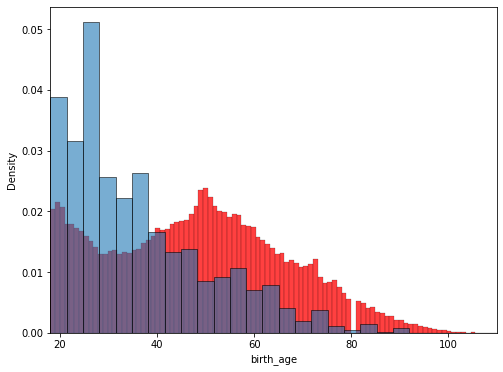

In [21]:
fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(uc_vreg['birth_age'], stat='density', color='r', ax=ax)
sns.histplot(denied_voters['birth_age'], stat='density', alpha=0.6, ax=ax)
ax.set_xlim(18,110)

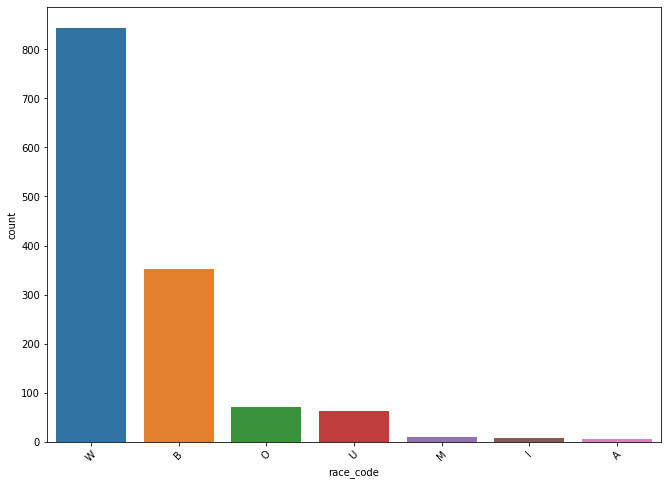

In [22]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='race_code', data=denied_voters,
                   order=(denied_voters['race_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

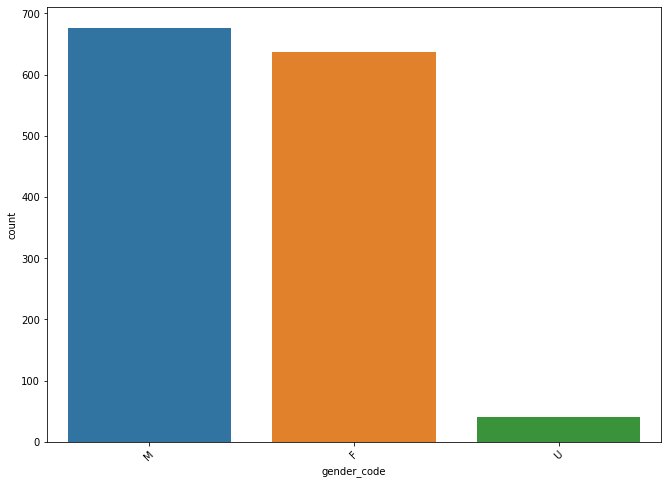

In [23]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='gender_code', data=denied_voters,
                   order=(denied_voters['gender_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

### Inactive Voters

In [24]:
inactive_voters = all_uc_voters.groupby('voter_status_desc').get_group('INACTIVE')
print(len(inactive_voters))
inactive_voters.head()

23528


county_id county_desc  voter_reg_num election_lbl       election_desc  \
87         NaN         NaN            NaN          NaN                 NaN   
109        NaN         NaN            NaN          NaN                 NaN   
145       90.0       UNION       200444.0   11/06/2012  11/06/2012 GENERAL   
347       90.0       UNION       240783.0   11/06/2012  11/06/2012 GENERAL   
362       90.0       UNION       236007.0   11/06/2018  11/06/2018 GENERAL   

        voting_method voted_party_cd voted_party_desc pct_label  \
87                NaN            NaN              NaN       NaN   
109               NaN            NaN              NaN       NaN   
145  ABSENTEE ONESTOP            UNA     UNAFFILIATED       013   
347         IN-PERSON            UNA     UNAFFILIATED      020A   
362         IN-PERSON            UNA     UNAFFILIATED       031   

    pct_description      ncid  voted_county_id voted_county_desc vtd_label  \
87              NaN  EF187881              NaN               NaN       NaN   
109             NaN  EF201789              NaN               NaN       NaN   
145             013  EF123802             90.0             UNION       013   
347            020A  EF155408             90.0             UNION      020A   
362             031  EF151749             90.0             UNION       031   

    vtd_description status_cd voter_status_desc reason_cd  \
87              NaN         I          INACTIVE        IN   
109             NaN         I          INACTIVE        IN   
145             013         I          INACTIVE        IN   
347            020A         I          INACTIVE        IN   
362             031         I          INACTIVE        IN   

      voter_status_reason_desc absent_ind name_prefx_cd       last_name  \
87   CONFIRMATION NOT RETURNED                                     ABAR   
109  CONFIRMATION NOT RETURNED                           ABARCA-NICOLAS   
145  CONFIRMATION NOT RETURNED                                    ABBAS   
347  CONFIRMATION NOT RETURNED                                   ABBOTT   
362  CONFIRMATION NOT RETURNED                                   ABBOTT   

    first_name middle_name name_suffix_lbl             res_street_address  \
87     KRISTEN      ELAINE             NaN             5523  CHERAW RD      
109       JOSE     ALBERTO             NaN               616  JONES ST      
145       OMAR     MOHAMED             NaN  2206  HONEYCUTT SIMPSON RD      
347       MARY         SUE             NaN              4122  EUTAW DR      
362       NEIL         NaN             NaN           5127  CRUZ BAY DR      

    res_city_desc state_cd  zip_code                 mail_addr1 mail_addr2  \
87     MARSHVILLE       NC   28103.0             5523 CHERAW RD        NaN   
109        MONROE       NC   28110.0               616 JONES ST        NaN   
145        MONROE       NC   28110.0  2206 HONEYCUTT SIMPSON RD        NaN   
347        WAXHAW       NC   28173.0              4122 EUTAW DR        NaN   
362        MONROE       NC   28110.0           5127 CRUZ BAY DR        NaN   

    mail_addr3 mail_addr4   mail_city mail_state mail_zipcode  \
87         NaN        NaN  MARSHVILLE         NC        28103   
109        NaN        NaN      MONROE         NC        28110   
145        NaN        NaN      MONROE         NC        28110   
347        NaN        NaN      WAXHAW         NC        28173   
362        NaN        NaN      MONROE         NC        28110   

     full_phone_number race_code ethnic_code party_cd gender_code  birth_age  \
87                 NaN         W          NL      DEM           F         24   
109                NaN         O          NL      UNA           M         22   
145                NaN         O          UN      UNA           M         33   
347                NaN         W          NL      UNA           F         40   
362                NaN         W          UN      UNA           U         41   

    birth_state drivers_lic  registr_dt pr

In [25]:
inactive_voters['voter_status_reason_desc'].value_counts()

CONFIRMATION NOT RETURNED              12980
CONFIRMATION RETURNED UNDELIVERABLE    10547
ADMINISTRATIVE                             1
Name: voter_status_reason_desc, dtype: int64

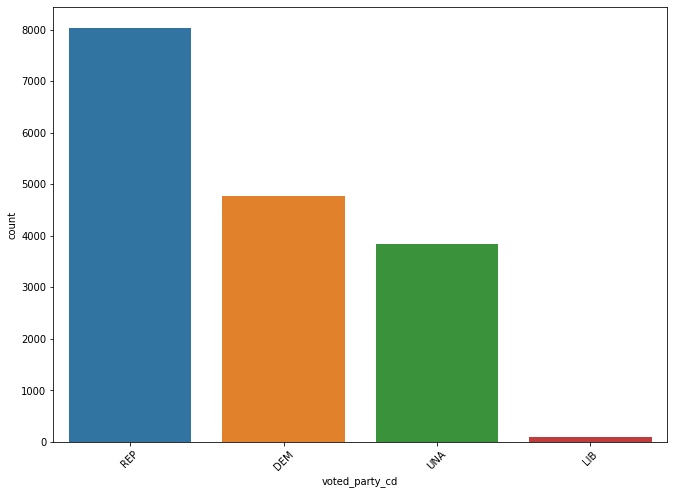

In [26]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='voted_party_cd', data=inactive_voters,
                   order=(inactive_voters[
                       'voted_party_cd'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

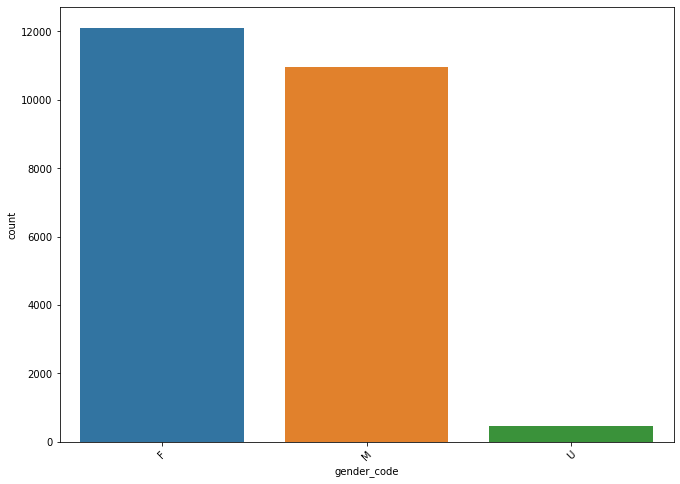

In [27]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='gender_code', data=inactive_voters,
                   order=(inactive_voters['gender_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

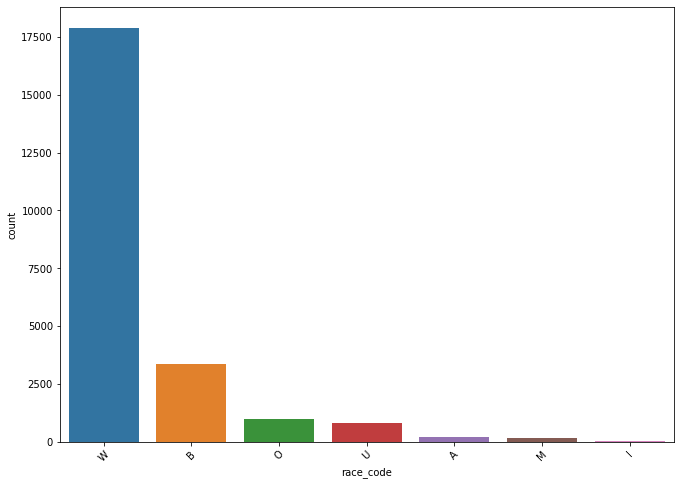

In [28]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='race_code', data=inactive_voters,
                   order=(inactive_voters['race_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

(18.0, 110.0)

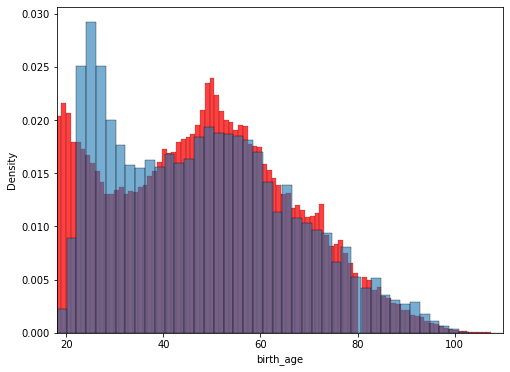

In [29]:
fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(uc_vreg['birth_age'], stat='density', color='r', ax=ax)
sns.histplot(inactive_voters['birth_age'], stat='density', alpha=0.6, ax=ax)
ax.set_xlim(18,110)

### Removed Voters

In [30]:
removed_voters = all_uc_voters.groupby('voter_status_desc').get_group('REMOVED')
print(len(removed_voters))
removed_voters.head()

39285


county_id county_desc  voter_reg_num election_lbl       election_desc  \
85        90.0       UNION       259695.0   11/06/2012  11/06/2012 GENERAL   
86        90.0       UNION       259695.0   11/04/2014  11/04/2014 GENERAL   
214       90.0       UNION       243470.0   11/06/2012  11/06/2012 GENERAL   
256       90.0       UNION       190348.0   11/06/2012  11/06/2012 GENERAL   
257       90.0       UNION       190348.0   11/04/2014  11/04/2014 GENERAL   

        voting_method voted_party_cd voted_party_desc pct_label  \
85          IN-PERSON            REP       REPUBLICAN       006   
86          IN-PERSON            REP       REPUBLICAN       024   
214         IN-PERSON            REP       REPUBLICAN      028B   
256  ABSENTEE ONESTOP            REP       REPUBLICAN       019   
257  ABSENTEE ONESTOP            REP       REPUBLICAN       019   

    pct_description      ncid  voted_county_id voted_county_desc vtd_label  \
85              006  EF170044             90.0             UNION       006   
86              024  EF170044             90.0             UNION       024   
214            028B  EF157603             90.0             UNION       028   
256             019  EF113706             90.0             UNION       019   
257             019  EF113706             90.0             UNION       019   

    vtd_description status_cd voter_status_desc reason_cd  \
85              006         R           REMOVED        RM   
86              024         R           REMOVED        RM   
214             028         R           REMOVED        RL   
256             019         R           REMOVED        RS   
257             019         R           REMOVED        RS   

                              voter_status_reason_desc absent_ind  \
85   REMOVED AFTER 2 FED GENERAL ELECTIONS IN INACT...              
86   REMOVED AFTER 2 FED GENERAL ELECTIONS IN INACT...              
214                                  MOVED FROM COUNTY              
256                                   MOVED FROM STATE              
257                                   MOVED FROM STATE              

    name_prefx_cd last_name first_name middle_name name_suffix_lbl  \
85                     ABAR      JAMES   FREDERICK                   
86                     ABAR      JAMES   FREDERICK                   
214                   ABBEN     LAURIN     DOROTHY                   
256                  ABBOTT       ALAN      WALTER                   
257                  ABBOTT       ALAN      WALTER                   

    res_street_address res_city_desc state_cd  zip_code mail_addr1 mail_addr2  \
85             REMOVED           NaN      NaN       NaN                         
86             REMOVED           NaN      NaN       NaN                         
214            REMOVED           NaN      NaN       NaN                         
256            REMOVED           NaN      NaN       NaN                         
257            REMOVED           NaN      NaN       NaN                         

    mail_addr3 mail_addr4 mail_city mail_state mail_zipcode  \
85                                                            
86                                                            
214                                                           
256                                                           
257                                                           

     full_phone_number race_code ethnic_code party_cd gender_code  birth_age  \
85                 NaN         W          NL      REP           M         49   
86                 NaN         W          NL      REP           M         49   
214                NaN         W          NL      REP           F         29   
256                NaN         W          NL      REP           M         52   
257                NaN         W          NL      REP           M         52   

    birth_state drivers_lic  registr_dt precinct_abbrv precinct_desc  \
85           MI           Y  02/09/2012   

In [31]:
removed_voters['voter_status_reason_desc'].value_counts()

DECEASED                                                    21403
MOVED FROM STATE                                            11032
MOVED FROM COUNTY                                            3170
REMOVED AFTER 2 FED GENERAL ELECTIONS IN INACTIVE STATUS     2230
REQUEST FROM VOTER                                            518
MOVED WITHIN STATE                                            329
FELONY CONVICTION                                             234
FELONY SENTENCE COMPLETED                                     217
TEMPORARY REGISTRANT                                           93
DUPLICATE                                                      45
ADMINISTRATIVE                                                 14
Name: voter_status_reason_desc, dtype: int64

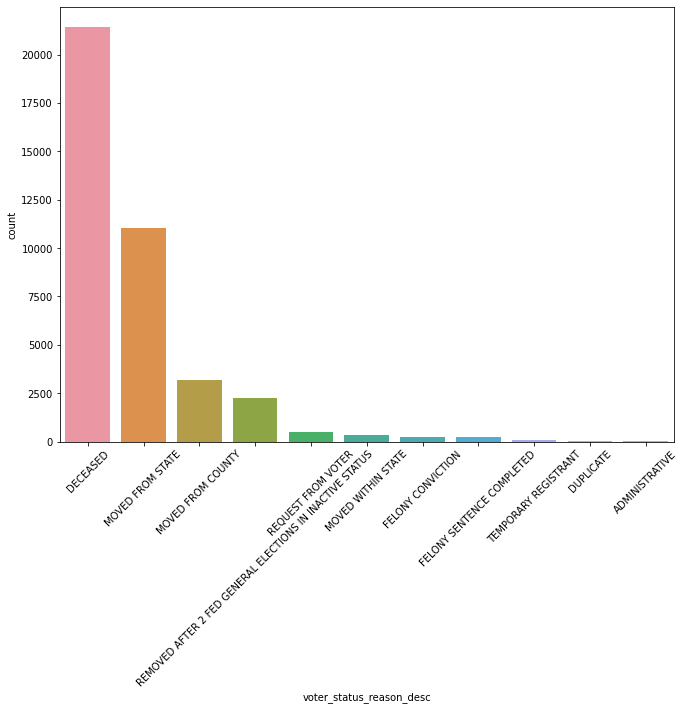

In [32]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='voter_status_reason_desc', data=removed_voters,
                   order=(removed_voters[
                       'voter_status_reason_desc'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

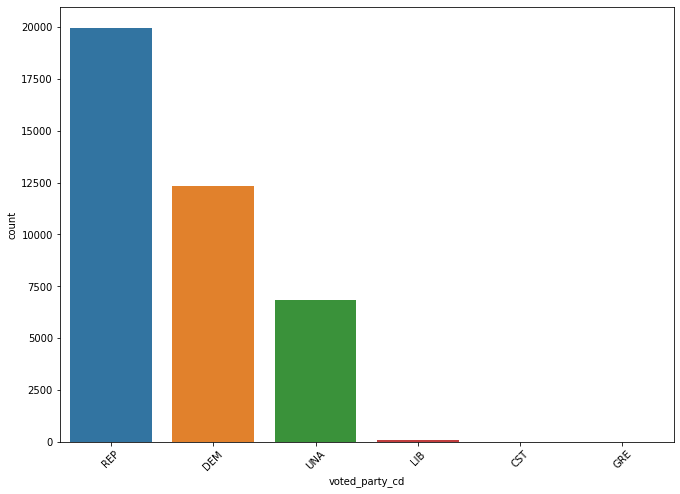

In [33]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='voted_party_cd', data=removed_voters,
                   order=(removed_voters[
                       'voted_party_cd'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

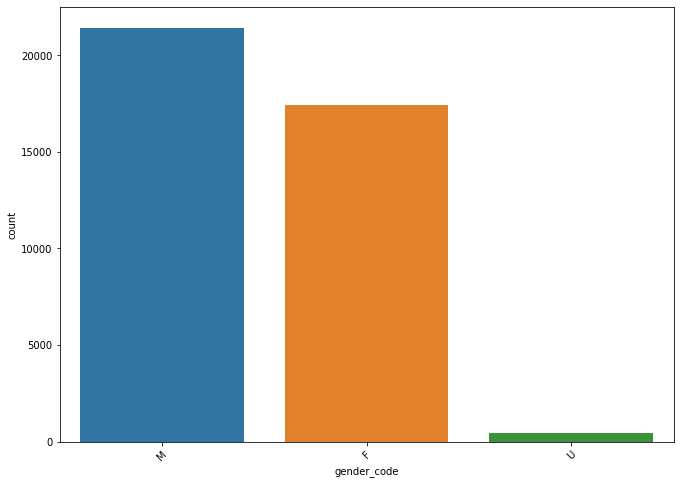

In [34]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='gender_code', data=removed_voters,
                   order=(removed_voters['gender_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

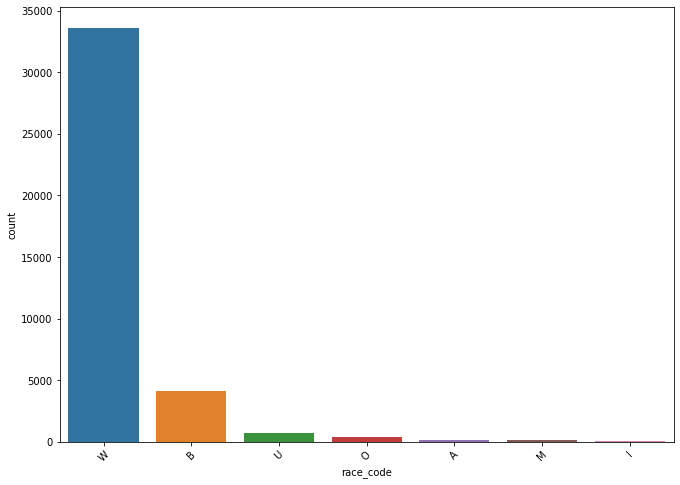

In [35]:
fig,ax = plt.subplots(figsize=(11,8))
ax = sns.countplot(x='race_code', data=removed_voters,
                   order=(removed_voters['race_code'].value_counts().index))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

(18.0, 110.0)

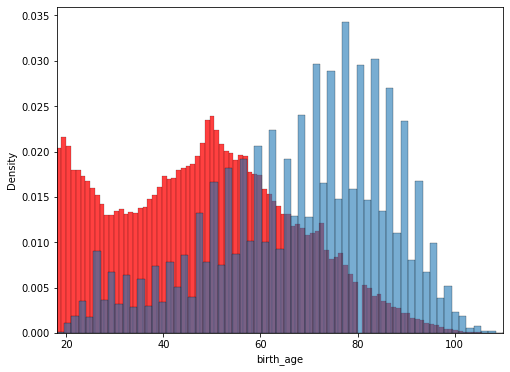

In [36]:
fig,ax = plt.subplots(figsize=(8,6))
sns.histplot(uc_vreg['birth_age'], stat='density', color='r', ax=ax)
sns.histplot(removed_voters['birth_age'], stat='density', alpha=0.6, ax=ax)
ax.set_xlim(18,110)

## Drop 'Removed' and 'Denied' Voters - Further Exploration

In [37]:
## Drop voters who have been removed or had their registration denied
uc_voters = all_uc_voters.loc[all_uc_voters['voter_status_desc'] != 'REMOVED']
uc_voters = uc_voters.loc[uc_voters['voter_status_desc'] != 'DENIED']
# uc_voters.info()

In [38]:
## Check remaining number of unique individuals represented in the data
uc_voters['ncid'].nunique()

169252

In [39]:
## Find record(s) with the most missing information
print(uc_voters.isna().mean(axis=1).max())
uc_voters.loc[uc_voters.isna().mean(axis=1).idxmax()]
# Max amount of missing values per row = 50%
# Example below is for an individual who has no voting history

0.5


county_id                                     NaN
county_desc                                   NaN
voter_reg_num                                 NaN
election_lbl                                  NaN
election_desc                                 NaN
voting_method                                 NaN
voted_party_cd                                NaN
voted_party_desc                              NaN
pct_label                                     NaN
pct_description                               NaN
ncid                                     EF229843
voted_county_id                               NaN
voted_county_desc                             NaN
vtd_label                                     NaN
vtd_description                               NaN
status_cd                                       A
voter_status_desc                          ACTIVE
reason_cd                                      AV
voter_status_reason_desc                 VERIFIED
absent_ind                                       


In [40]:
## The majority of records have at least 2/3 of the information
## No records are perfectly complete due to several unused columns
uc_voters.isna().mean(axis=1).value_counts().sort_index(ascending=False)

0.500000       104
0.487805      1023
0.475610      4126
0.463415       200
0.451220       412
0.439024      2726
0.426829      8993
0.414634       480
0.402439         7
0.390244         3
0.378049         1
0.353659         4
0.341463        31
0.329268      3825
0.317073     67947
0.304878    159146
0.292683      9134
0.280488     10719
0.268293    144012
0.256098    346741
0.243902     19716
0.231707      4012
0.219512      1706
0.207317       110
dtype: int64

In [41]:
## Check the number of records corresponding to the top 15 elections
elec_counts_df = uc_voters['election_desc'].value_counts().to_frame()
elec_counts_df.iloc[:15]

election_desc
11/03/2020 GENERAL                       131416
11/08/2016 GENERAL                       102352
11/06/2012 GENERAL                        86577
11/06/2018 GENERAL                        86162
09/10/2019 GENERAL                        59172
11/04/2014 GENERAL                        54937
03/15/2016 PRIMARY                        44139
03/03/2020 PRIMARY                        43285
05/08/2012 PRIMARY                        36411
05/08/2018 PRIMARY                        17575
05/06/2014 PRIMARY                        14227
05/14/2019 PRIMARY                        12509
11/05/2019 MUNICIPAL                      12433
06/07/2016 CONGRESSIONAL PRIMARY          11659
11/07/2017 MUNICIPAL                      10749

## Engineer Features for Grouping/ Database Manipulation

In [42]:
uc_voters.insert(loc=5, column='election_cat', 
                 value=uc_voters['election_desc'].str.split(n=1,
                                                            expand=True)[1])
uc_voters['election_cat'] = np.where(uc_voters['election_cat'].isin(
                                                    ['GENERAL', 'PRIMARY']),
                                     uc_voters['election_cat'], 'other')

uc_voters['election_lbl'] = pd.to_datetime(uc_voters['election_lbl'])
uc_voters.insert(loc=5, column='election_yr',
                 value=uc_voters['election_lbl'].dt.year)

uc_voters.insert(loc=7, column='major_elec',
                 value=np.where(((uc_voters['election_yr']%2 == 0) & 
                                 (uc_voters['election_cat'].isin(
                                     ['GENERAL', 'PRIMARY']))),
                                1,0))

uc_voters.insert(loc=8, column='presid_elec',
                 value=np.where(((uc_voters['election_yr']%4 == 0) & 
                                 (uc_voters['election_cat'].isin(
                                     ['GENERAL', 'PRIMARY']))),
                                1,0))

vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Early',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day'}

uc_voters.insert(loc=10, column='vote_method_cat',
                 value=uc_voters['voting_method'].map(vote_method_map))

# uc_voters.insert(loc=12, column='vote_early',
#                  value=np.where(uc_voters['voting_method'].isin(
#                      ['ABSENTEE ONESTOP', 'ABSENTEE CURBSIDE']),
#                                 1,0))

# uc_voters.insert(loc=13, column='vote_by_mail',
#                  value=np.where(uc_voters['voting_method'] == 'ABSENTEE BY MAIL',
#                                 1,0))

# uc_voters.insert(loc=14, column='vote_curbside',
#                  value=np.where(uc_voters['voting_method'].isin(
#                      ['CURBSIDE', 'ABSENTEE CURBSIDE']),
#                                 1,0))

# uc_voters['birth_age_adj'] = uc_voters['election_yr'].subtract(uc_voters['birth_year'])
# uc_voters.head()

In [43]:
## Null values in the election_desc col indicate individuals that are 
  ## registered to vote, but have not voted in a recent major election.
    ## Thus, election_cat, major_elec, and presid_elec 
    ## are irrelevant for these records
uc_voters.loc[uc_voters['election_desc'].isna(),
              ['election_cat', 'major_elec',
               'presid_elec']] = np.nan

  ## Fill with NaN with 'None' in election_desc col to preserve info for
    ## registered voters without a voting history when merging df's based on 
    ## ncid and election_desc below
uc_voters['election_desc'].fillna('None', inplace=True)
uc_voters.head()

county_id county_desc  voter_reg_num election_lbl  \
0       90.0       UNION       346446.0   2020-11-03   
1       90.0       UNION       348004.0   2020-11-03   
2        NaN         NaN            NaN          NaT   
3       90.0       UNION       288489.0   2011-11-08   
4       90.0       UNION       288489.0   2012-11-06   

                  election_desc  election_yr election_cat  major_elec  \
0            11/03/2020 GENERAL       2020.0      GENERAL         1.0   
1            11/03/2020 GENERAL       2020.0      GENERAL         1.0   
2                          None          NaN          NaN         NaN   
3  11/08/2011 MUNICIPAL GENERAL       2011.0        other         0.0   
4            11/06/2012 GENERAL       2012.0      GENERAL         1.0   

   presid_elec     voting_method vote_method_cat voted_party_cd  \
0          1.0  ABSENTEE ONESTOP           Early            UNA   
1          1.0  ABSENTEE ONESTOP           Early            DEM   
2          NaN               NaN             NaN            NaN   
3          0.0         IN-PERSON    Election Day            UNA   
4          1.0  ABSENTEE ONESTOP           Early            UNA   

  voted_party_desc pct_label pct_description      ncid  voted_county_id  \
0     UNAFFILIATED      020A            020A  EF230133             90.0   
1       DEMOCRATIC      020A            020A  EF231096             90.0   
2              NaN       NaN             NaN  AL261840              NaN   
3     UNAFFILIATED      26.1            26.1  AL178177             11.0   
4     UNAFFILIATED      26.1            26.1  AL178177             11.0   

  voted_county_desc vtd_label vtd_description status_cd voter_status_desc  \
0             UNION      020A            020A         A            ACTIVE   
1             UNION      020A            020A         A            ACTIVE   
2               NaN       NaN             NaN         A            ACTIVE   
3          BUNCOMBE      26.1            26.1         A            ACTIVE   
4          BUNCOMBE      26.1            26.1         A            ACTIVE   

  reason_cd voter_status_reason_desc absent_ind name_prefx_cd last_name  \
0        AV                 VERIFIED                             AALAEI   
1        AV                 VERIFIED                             AALAEI   
2        AV                 VERIFIED                            AALBORG   
3        AV                 VERIFIED                            AALBORG   
4        AV                 VERIFIED                            AALBORG   

  first_name middle_name name_suffix_lbl         res_street_address  \
0       ARIO         NaN             NaN   4009  MILLBRIDGE PKWY      
1    KAVITHA         NaN             NaN   4009  MILLBRIDGE PKWY      
2     ALEXIS       LEANN             NaN  1001  STEVENS PRIDE CT      
3      BRYAN         LEE             NaN  1001  STEVENS PRIDE CT      
4      BRYAN         LEE             NaN  1001  STEVENS PRIDE CT      

  res_city_desc state_cd  zip_code             mail_addr1 mail_addr2  \
0        WAXHAW       NC   28173.0   4009 MILLBRIDGE PKWY        NaN   
1        WAXHAW       NC   28173.0   4009 MILLBRIDGE PKWY        NaN   
2  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   
3  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   
4  INDIAN TRAIL       NC   28079.0  1001 STEVENS PRIDE CT        NaN   

  mail_addr3 mail_addr4     mail_city mail_state mail_zipcode  \
0        NaN        NaN        WAXHAW         NC        28173   
1        NaN        NaN        WAXHAW         NC        28173   
2        NaN        NaN  INDIAN TRAIL         NC        28079   
3        NaN        NaN  INDIAN TRAIL         NC        28079   
4        NaN        NaN  INDIAN TRAIL         NC        28079   

   full_phone_number race_code ethnic_code party_cd gender_code  birth_age  \
0                NaN         W          NL      UNA           M         46   
1                NaN         A          NL      DEM 

In [44]:
uc_voters['ncid'].nunique()

169252

In [45]:
other_elec_idx = uc_voters.loc[uc_voters['election_cat']=='other'].index

In [46]:
major_elec_df = uc_voters.drop(index=other_elec_idx)
major_elec_df['ncid'].nunique()

169121

In [47]:
# 131 voters voted in a non-major election, but no major elections
uc_voters['ncid'].nunique() - major_elec_df['ncid'].nunique()

131

## Merge DataFrames - Focus on Recent Major Elections

In [48]:
## Get list of unique ncids
uc_ncid_list = list(uc_voters['ncid'].unique())

## Get list of unique election description
major_elections = list(uc_voters.groupby('major_elec').get_group(1)['election_desc'].unique())

## Add 'None' to the list to capture individuals that have not voted in any 
  ## recent major election when merging dataframes on ncid and election_desc
elec_desc_list = major_elections + ['None']
elec_desc_list

['11/03/2020 GENERAL',
 '11/06/2012 GENERAL',
 '05/08/2012 PRIMARY',
 '03/15/2016 PRIMARY',
 '11/06/2018 GENERAL',
 '11/08/2016 GENERAL',
 '11/04/2014 GENERAL',
 '03/03/2020 PRIMARY',
 '05/08/2018 PRIMARY',
 '05/06/2014 PRIMARY',
 'None']

In [49]:
## Create multiindex that lists every election for every registered voter
mltidx = pd.MultiIndex.from_tuples(
    [(ncid, elec) for ncid in uc_ncid_list for elec in elec_desc_list],
    names=['ncid', 'election_desc'])

## Use multiindex to create new dataframe
elecs_by_voter = pd.DataFrame(index=mltidx)

In [50]:
## Check length and inspect structure of new dataframe
print(len(elecs_by_voter))
elecs_by_voter.head(15)

1861772


Empty DataFrame
Columns: []
Index: [(EF230133, 11/03/2020 GENERAL), (EF230133, 11/06/2012 GENERAL), (EF230133, 05/08/2012 PRIMARY), (EF230133, 03/15/2016 PRIMARY), (EF230133, 11/06/2018 GENERAL), (EF230133, 11/08/2016 GENERAL), (EF230133, 11/04/2014 GENERAL), (EF230133, 03/03/2020 PRIMARY), (EF230133, 05/08/2018 PRIMARY), (EF230133, 05/06/2014 PRIMARY), (EF230133, None), (EF231096, 11/03/2020 GENERAL), (EF231096, 11/06/2012 GENERAL), (EF231096, 05/08/2012 PRIMARY), (EF231096, 03/15/2016 PRIMARY)]

In [51]:
## Merge voter histories using the created multiindex as the keys to join
  ## each ncid onto every election and 'None'
voter_elecs = elecs_by_voter.merge(uc_vhis, how='left',
                                   on=['ncid', 'election_desc'])
# Inspect new df
print(len(voter_elecs))
display(voter_elecs.head())
voter_elecs.tail()

1861781


ncid       election_desc  county_id county_desc  voter_reg_num  \
0  EF230133  11/03/2020 GENERAL       90.0       UNION       346446.0   
1  EF230133  11/06/2012 GENERAL        NaN         NaN            NaN   
2  EF230133  05/08/2012 PRIMARY        NaN         NaN            NaN   
3  EF230133  03/15/2016 PRIMARY        NaN         NaN            NaN   
4  EF230133  11/06/2018 GENERAL        NaN         NaN            NaN   

  election_lbl     voting_method voted_party_cd voted_party_desc pct_label  \
0   11/03/2020  ABSENTEE ONESTOP            UNA     UNAFFILIATED      020A   
1          NaN               NaN            NaN              NaN       NaN   
2          NaN               NaN            NaN              NaN       NaN   
3          NaN               NaN            NaN              NaN       NaN   
4          NaN               NaN            NaN              NaN       NaN   

  pct_description  voted_county_id voted_county_desc vtd_label vtd_description  
0            020A             90.0             UNION      020A            020A  
1             NaN              NaN               NaN       NaN             NaN  
2             NaN              NaN               NaN       NaN             NaN  
3             NaN              NaN               NaN       NaN             NaN  
4             NaN              NaN               NaN       NaN             NaN

ncid       election_desc  county_id county_desc  voter_reg_num  \
1861776  EF219265  11/04/2014 GENERAL        NaN         NaN            NaN   
1861777  EF219265  03/03/2020 PRIMARY        NaN         NaN            NaN   
1861778  EF219265  05/08/2018 PRIMARY        NaN         NaN            NaN   
1861779  EF219265  05/06/2014 PRIMARY        NaN         NaN            NaN   
1861780  EF219265                None        NaN         NaN            NaN   

        election_lbl voting_method voted_party_cd voted_party_desc pct_label  \
1861776          NaN           NaN            NaN              NaN       NaN   
1861777          NaN           NaN            NaN              NaN       NaN   
1861778          NaN           NaN            NaN              NaN       NaN   
1861779          NaN           NaN            NaN              NaN       NaN   
1861780          NaN           NaN            NaN              NaN       NaN   

        pct_description  voted_county_id voted_county_desc vtd_label  \
1861776             NaN              NaN               NaN       NaN   
1861777             NaN              NaN               NaN       NaN   
1861778             NaN              NaN               NaN       NaN   
1861779             NaN              NaN               NaN       NaN   
1861780             NaN              NaN               NaN       NaN   

        vtd_description  
1861776             NaN  
1861777             NaN  
1861778             NaN  
1861779             NaN  
1861780             NaN

In [52]:
## Check for duplicate rows
voter_elecs.duplicated().sum()

0

In [53]:
## Create a list of columns to drop when performing next merge to limit size
  ## of new dataframe
# List of columns that were mostly null for original merged df
mostly_null_cols = [col for col in all_uc_voters.columns if all_uc_voters[col].isna().mean() >= 0.9]

# List of columns that are filled with empty white space
empty_cols = [col for col in all_uc_voters.columns if all_uc_voters[col].unique()[0] == ' ']

# List of municipality and mailing address info columns 
  # (not very useful, a lot of NaN)
munic_cols = [col for col in all_uc_voters.columns if col.startswith('munic')]
mail_cols = [col for col in all_uc_voters.columns if col.startswith('mail')]

# Combine all lists into one list of columns to drop
cols_to_drop = mostly_null_cols + empty_cols + munic_cols + mail_cols

In [54]:
## Merge voter registration information onto the new df based on ncid
voter_elecs = voter_elecs.merge(uc_vreg.drop(columns=cols_to_drop+['county_id',
                                                      'county_desc',
                                                      'voter_reg_num'],
                                             axis=1),
                                how='left', on='ncid')
# inspect resulting df
voter_elecs.head()

ncid       election_desc  county_id county_desc  voter_reg_num  \
0  EF230133  11/03/2020 GENERAL       90.0       UNION       346446.0   
1  EF230133  11/06/2012 GENERAL        NaN         NaN            NaN   
2  EF230133  05/08/2012 PRIMARY        NaN         NaN            NaN   
3  EF230133  03/15/2016 PRIMARY        NaN         NaN            NaN   
4  EF230133  11/06/2018 GENERAL        NaN         NaN            NaN   

  election_lbl     voting_method voted_party_cd voted_party_desc pct_label  \
0   11/03/2020  ABSENTEE ONESTOP            UNA     UNAFFILIATED      020A   
1          NaN               NaN            NaN              NaN       NaN   
2          NaN               NaN            NaN              NaN       NaN   
3          NaN               NaN            NaN              NaN       NaN   
4          NaN               NaN            NaN              NaN       NaN   

  pct_description  voted_county_id voted_county_desc vtd_label  \
0            020A             90.0             UNION      020A   
1             NaN              NaN               NaN       NaN   
2             NaN              NaN               NaN       NaN   
3             NaN              NaN               NaN       NaN   
4             NaN              NaN               NaN       NaN   

  vtd_description status_cd voter_status_desc reason_cd  \
0            020A         A            ACTIVE        AV   
1             NaN         A            ACTIVE        AV   
2             NaN         A            ACTIVE        AV   
3             NaN         A            ACTIVE        AV   
4             NaN         A            ACTIVE        AV   

  voter_status_reason_desc last_name first_name middle_name  \
0                 VERIFIED    AALAEI       ARIO         NaN   
1                 VERIFIED    AALAEI       ARIO         NaN   
2                 VERIFIED    AALAEI       ARIO         NaN   
3                 VERIFIED    AALAEI       ARIO         NaN   
4                 VERIFIED    AALAEI       ARIO         NaN   

         res_street_address res_city_desc state_cd  zip_code race_code  \
0  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
1  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
2  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
3  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
4  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   

  ethnic_code party_cd gender_code  birth_age birth_state drivers_lic  \
0          NL      UNA           M         46          OC           Y   
1          NL      UNA           M         46          OC           Y   
2          NL      UNA           M         46          OC           Y   
3          NL      UNA           M         46          OC           Y   
4          NL      UNA           M         46          OC           Y   

   registr_dt precinct_abbrv precinct_desc  cong_dist_abbrv super_court_abbrv  \
0  04/25/2019           020A          020A              9.0               20B   
1  04/25/2019           020A          020A              9.0               20B   
2  04/25/2019           020A          020A              9.0               20B   
3  04/25/2019           020A          020A              9.0               20B   
4  04/25/2019           020A          020A              9.0               20B   

  judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  \
0              20C             35.0            68.0                2.0   
1              20C             35.0            68.0                2.0   
2              20C             35.0            68.0                2.0   
3              20C             35.0            68.0                2.0   
4              20C             35.0            68.0                2.0   

  school_dist_desc  dist_1_abbrv         dist_1_desc confidential_ind  \
0        SCHOOL #2          30.0  30TH PROSECUTORIAL                N   
1     

# Scrub and Explore (Part II)

## Drop Duplicate and Obviously Incorrect Records

In [55]:
## Check for duplicate identical rows
voter_elecs.duplicated().sum()

0

In [56]:
## Check length of new df
len(voter_elecs)

1861781

In [57]:
## Check the intended length of the new df if every unique ncid
  ## appears only once for each election description
voter_elecs['ncid'].nunique() * voter_elecs['election_desc'].nunique()

1861772

In [58]:
## There are 9 instances where an ncid shows up as casting a vote
  ## more than once in the same election
voter_elecs.duplicated(subset=['ncid', 'election_desc']).sum()

9

In [59]:
## A total of 6 individuals show up twice for a single election
  ## One individual shows up twice in 3 separate elections
dup_ncid_elecs = voter_elecs.loc[voter_elecs.duplicated(subset=['ncid', 'election_desc'], keep=False)]
dup_ncid_elecs

ncid       election_desc  county_id county_desc  voter_reg_num  \
252774     EF78820  11/08/2016 GENERAL       90.0       UNION       341724.0   
252775     EF78820  11/08/2016 GENERAL       90.0       UNION       341724.0   
281899     EF93894  11/06/2012 GENERAL       90.0       UNION       272193.0   
281900     EF93894  11/06/2012 GENERAL       90.0       UNION       272193.0   
698514     EF69085  11/06/2012 GENERAL       90.0       UNION       144979.0   
698515     EF69085  11/06/2012 GENERAL       90.0       UNION       144979.0   
757079    EF186914  11/06/2012 GENERAL       90.0       UNION       307237.0   
757080    EF186914  11/06/2012 GENERAL       90.0       UNION       307237.0   
1358607  CW1012090  11/06/2018 GENERAL       90.0       UNION       338735.0   
1358608  CW1012090  11/06/2018 GENERAL       90.0       UNION       338735.0   
1543343   EF164225  11/08/2016 GENERAL       90.0       UNION       252400.0   
1543344   EF164225  11/08/2016 GENERAL       90.0       UNION       252400.0   
1625686   DB153036  11/06/2012 GENERAL       90.0       UNION       364740.0   
1625687   DB153036  11/06/2012 GENERAL       90.0       UNION       364740.0   
1625689   DB153036  03/15/2016 PRIMARY       90.0       UNION       364740.0   
1625690   DB153036  03/15/2016 PRIMARY       90.0       UNION       364740.0   
1625692   DB153036  11/08/2016 GENERAL       90.0       UNION       364740.0   
1625693   DB153036  11/08/2016 GENERAL       90.0       UNION       364740.0   

        election_lbl     voting_method voted_party_cd voted_party_desc  \
252774    11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
252775    11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
281899    11/06/2012         IN-PERSON            DEM       DEMOCRATIC   
281900    11/06/2012  ABSENTEE ONESTOP            DEM       DEMOCRATIC   
698514    11/06/2012         IN-PERSON            REP       REPUBLICAN   
698515    11/06/2012         IN-PERSON            REP       REPUBLICAN   
757079    11/06/2012         IN-PERSON            REP       REPUBLICAN   
757080    11/06/2012  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
1358607   11/06/2018       PROVISIONAL            REP       REPUBLICAN   
1358608   11/06/2018         IN-PERSON            REP       REPUBLICAN   
1543343   11/08/2016         IN-PERSON            DEM       DEMOCRATIC   
1543344   11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
1625686   11/06/2012  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
1625687   11/06/2012  ABSENTEE ONESTOP            REP       REPUBLICAN   
1625689   03/15/2016  ABSENTEE ONESTOP            DEM       DEMOCRATIC   
1625690   03/15/2016         IN-PERSON            REP       REPUBLICAN   
1625692   11/08/2016  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
1625693   11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   

        pct_label pct_description  voted_county_id voted_county_desc  \
252774       029A            029A             90.0             UNION   
252775      11-01           11-01             13.0          CABARRUS   
281899       BURN      BURNSVILLE              4.0             ANSON   
281900        009             009             90.0             UNION   
698514        039             039             90.0             UNION   
698515        039             039             90.0             UNION   
757079       038A            038A             90.0             UNION   
757080        CUL       CULLOWHEE             50.0           JACKSON   
1358607      020B            020B             90.0             UNION   
1358608       058         PCT 058             60.0       MECKLENBURG   
1543343      028D            028D             90.0             UNION   
1543344       022         PCT 022             60.0       MECKLENBURG   
1625686       W25             W25             65.0       NEW HANOVER   
1625687      0070           SALEM             12.0             BURKE   
162568

In [60]:
## Examine the complete recent voting history of the 7 ncid's that show up 
  ## twice for a single election to investigate how the records differ
    ## and determine which record(s) to drop
for ncid in dup_ncid_elecs['ncid'].unique():
    display(voter_elecs.loc[voter_elecs['ncid']==ncid])

ncid       election_desc  county_id county_desc  voter_reg_num  \
252769  EF78820  11/03/2020 GENERAL       90.0       UNION       341724.0   
252770  EF78820  11/06/2012 GENERAL        NaN         NaN            NaN   
252771  EF78820  05/08/2012 PRIMARY        NaN         NaN            NaN   
252772  EF78820  03/15/2016 PRIMARY        NaN         NaN            NaN   
252773  EF78820  11/06/2018 GENERAL        NaN         NaN            NaN   
252774  EF78820  11/08/2016 GENERAL       90.0       UNION       341724.0   
252775  EF78820  11/08/2016 GENERAL       90.0       UNION       341724.0   
252776  EF78820  11/04/2014 GENERAL        NaN         NaN            NaN   
252777  EF78820  03/03/2020 PRIMARY        NaN         NaN            NaN   
252778  EF78820  05/08/2018 PRIMARY        NaN         NaN            NaN   
252779  EF78820  05/06/2014 PRIMARY        NaN         NaN            NaN   
252780  EF78820                None        NaN         NaN            NaN   

       election_lbl     voting_method voted_party_cd voted_party_desc  \
252769   11/03/2020  ABSENTEE ONESTOP            REP       REPUBLICAN   
252770          NaN               NaN            NaN              NaN   
252771          NaN               NaN            NaN              NaN   
252772          NaN               NaN            NaN              NaN   
252773          NaN               NaN            NaN              NaN   
252774   11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
252775   11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
252776          NaN               NaN            NaN              NaN   
252777          NaN               NaN            NaN              NaN   
252778          NaN               NaN            NaN              NaN   
252779          NaN               NaN            NaN              NaN   
252780          NaN               NaN            NaN              NaN   

       pct_label pct_description  voted_county_id voted_county_desc vtd_label  \
252769      038A            038A             90.0             UNION      038A   
252770       NaN             NaN              NaN               NaN       NaN   
252771       NaN             NaN              NaN               NaN       NaN   
252772       NaN             NaN              NaN               NaN       NaN   
252773       NaN             NaN              NaN               NaN       NaN   
252774      029A            029A             90.0             UNION      029A   
252775     11-01           11-01             13.0          CABARRUS     11-01   
252776       NaN             NaN              NaN               NaN       NaN   
252777       NaN             NaN              NaN               NaN       NaN   
252778       NaN             NaN              NaN               NaN       NaN   
252779       NaN             NaN              NaN               NaN       NaN   
252780       NaN             NaN              NaN               NaN       NaN   

       vtd_description status_cd voter_status_desc reason_cd  \
252769            038A         A            ACTIVE        AV   
252770             NaN         A            ACTIVE        AV   
252771             NaN         A            ACTIVE        AV   
252772             NaN         A            ACTIVE        AV   
252773             NaN         A            ACTIVE        AV   
252774            029A         A            ACTIVE        AV   
252775           11-01         A            ACTIVE        AV   
252776             NaN         A            ACTIVE        AV   
252777             NaN         A            ACTIVE        AV   
252778             NaN         A            ACTIVE        AV   
252779             NaN         A            ACTIVE        AV   
252780             NaN         A            ACTIVE        AV   

       voter_status_reason_desc last_name first_name middle_name  \
252769                 VERIFIED    CAPUTO       LISA         RAE   
252770                 VERIFIED    C

ncid       election_desc  county_id county_desc  voter_reg_num  \
281898  EF93894  11/03/2020 GENERAL        NaN         NaN            NaN   
281899  EF93894  11/06/2012 GENERAL       90.0       UNION       272193.0   
281900  EF93894  11/06/2012 GENERAL       90.0       UNION       272193.0   
281901  EF93894  05/08/2012 PRIMARY        NaN         NaN            NaN   
281902  EF93894  03/15/2016 PRIMARY        NaN         NaN            NaN   
281903  EF93894  11/06/2018 GENERAL        NaN         NaN            NaN   
281904  EF93894  11/08/2016 GENERAL        NaN         NaN            NaN   
281905  EF93894  11/04/2014 GENERAL        NaN         NaN            NaN   
281906  EF93894  03/03/2020 PRIMARY        NaN         NaN            NaN   
281907  EF93894  05/08/2018 PRIMARY        NaN         NaN            NaN   
281908  EF93894  05/06/2014 PRIMARY        NaN         NaN            NaN   
281909  EF93894                None        NaN         NaN            NaN   

       election_lbl     voting_method voted_party_cd voted_party_desc  \
281898          NaN               NaN            NaN              NaN   
281899   11/06/2012         IN-PERSON            DEM       DEMOCRATIC   
281900   11/06/2012  ABSENTEE ONESTOP            DEM       DEMOCRATIC   
281901          NaN               NaN            NaN              NaN   
281902          NaN               NaN            NaN              NaN   
281903          NaN               NaN            NaN              NaN   
281904          NaN               NaN            NaN              NaN   
281905          NaN               NaN            NaN              NaN   
281906          NaN               NaN            NaN              NaN   
281907          NaN               NaN            NaN              NaN   
281908          NaN               NaN            NaN              NaN   
281909          NaN               NaN            NaN              NaN   

       pct_label pct_description  voted_county_id voted_county_desc vtd_label  \
281898       NaN             NaN              NaN               NaN       NaN   
281899      BURN      BURNSVILLE              4.0             ANSON      BURN   
281900       009             009             90.0             UNION       009   
281901       NaN             NaN              NaN               NaN       NaN   
281902       NaN             NaN              NaN               NaN       NaN   
281903       NaN             NaN              NaN               NaN       NaN   
281904       NaN             NaN              NaN               NaN       NaN   
281905       NaN             NaN              NaN               NaN       NaN   
281906       NaN             NaN              NaN               NaN       NaN   
281907       NaN             NaN              NaN               NaN       NaN   
281908       NaN             NaN              NaN               NaN       NaN   
281909       NaN             NaN              NaN               NaN       NaN   

       vtd_description status_cd voter_status_desc reason_cd  \
281898             NaN         A            ACTIVE        AV   
281899            BURN         A            ACTIVE        AV   
281900             009         A            ACTIVE        AV   
281901             NaN         A            ACTIVE        AV   
281902             NaN         A            ACTIVE        AV   
281903             NaN         A            ACTIVE        AV   
281904             NaN         A            ACTIVE        AV   
281905             NaN         A            ACTIVE        AV   
281906             NaN         A            ACTIVE        AV   
281907             NaN         A            ACTIVE        AV   
281908             NaN         A            ACTIVE        AV   
281909             NaN         A            ACTIVE        AV   

       voter_status_reason_desc last_name first_name middle_name  \
281898                 VERIFIED  CHAMBERS      RONDA     SHENICE   
281899                 VERIFIED  CHA

ncid       election_desc  county_id county_desc  voter_reg_num  \
698513  EF69085  11/03/2020 GENERAL       90.0       UNION       144979.0   
698514  EF69085  11/06/2012 GENERAL       90.0       UNION       144979.0   
698515  EF69085  11/06/2012 GENERAL       90.0       UNION       144979.0   
698516  EF69085  05/08/2012 PRIMARY        NaN         NaN            NaN   
698517  EF69085  03/15/2016 PRIMARY        NaN         NaN            NaN   
698518  EF69085  11/06/2018 GENERAL       90.0       UNION       144979.0   
698519  EF69085  11/08/2016 GENERAL       90.0       UNION       144979.0   
698520  EF69085  11/04/2014 GENERAL        NaN         NaN            NaN   
698521  EF69085  03/03/2020 PRIMARY       90.0       UNION       144979.0   
698522  EF69085  05/08/2018 PRIMARY        NaN         NaN            NaN   
698523  EF69085  05/06/2014 PRIMARY        NaN         NaN            NaN   
698524  EF69085                None        NaN         NaN            NaN   

       election_lbl     voting_method voted_party_cd voted_party_desc  \
698513   11/03/2020  ABSENTEE ONESTOP            REP       REPUBLICAN   
698514   11/06/2012         IN-PERSON            REP       REPUBLICAN   
698515   11/06/2012         IN-PERSON            REP       REPUBLICAN   
698516          NaN               NaN            NaN              NaN   
698517          NaN               NaN            NaN              NaN   
698518   11/06/2018         IN-PERSON            REP       REPUBLICAN   
698519   11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
698520          NaN               NaN            NaN              NaN   
698521   03/03/2020  ABSENTEE ONESTOP            REP       REPUBLICAN   
698522          NaN               NaN            NaN              NaN   
698523          NaN               NaN            NaN              NaN   
698524          NaN               NaN            NaN              NaN   

       pct_label pct_description  voted_county_id voted_county_desc vtd_label  \
698513       039             039             90.0             UNION       039   
698514       039             039             90.0             UNION      038A   
698515       039             039             90.0             UNION       039   
698516       NaN             NaN              NaN               NaN       NaN   
698517       NaN             NaN              NaN               NaN       NaN   
698518       039             039             90.0             UNION       039   
698519       039             039             90.0             UNION       039   
698520       NaN             NaN              NaN               NaN       NaN   
698521       039             039             90.0             UNION       039   
698522       NaN             NaN              NaN               NaN       NaN   
698523       NaN             NaN              NaN               NaN       NaN   
698524       NaN             NaN              NaN               NaN       NaN   

       vtd_description status_cd voter_status_desc reason_cd  \
698513             039         A            ACTIVE        AV   
698514            038A         A            ACTIVE        AV   
698515             039         A            ACTIVE        AV   
698516             NaN         A            ACTIVE        AV   
698517             NaN         A            ACTIVE        AV   
698518             039         A            ACTIVE        AV   
698519             039         A            ACTIVE        AV   
698520             NaN         A            ACTIVE        AV   
698521             039         A            ACTIVE        AV   
698522             NaN         A            ACTIVE        AV   
698523             NaN         A            ACTIVE        AV   
698524             NaN         A            ACTIVE        AV   

       voter_status_reason_desc last_name first_name middle_name  \
698513                 VERIFIED  HAULISKA      DAVID     CHARLES   
698514                 VERIFIED  HAU

ncid       election_desc  county_id county_desc  voter_reg_num  \
757078  EF186914  11/03/2020 GENERAL       90.0       UNION       307237.0   
757079  EF186914  11/06/2012 GENERAL       90.0       UNION       307237.0   
757080  EF186914  11/06/2012 GENERAL       90.0       UNION       307237.0   
757081  EF186914  05/08/2012 PRIMARY        NaN         NaN            NaN   
757082  EF186914  03/15/2016 PRIMARY        NaN         NaN            NaN   
757083  EF186914  11/06/2018 GENERAL        NaN         NaN            NaN   
757084  EF186914  11/08/2016 GENERAL       90.0       UNION       307237.0   
757085  EF186914  11/04/2014 GENERAL       90.0       UNION       307237.0   
757086  EF186914  03/03/2020 PRIMARY        NaN         NaN            NaN   
757087  EF186914  05/08/2018 PRIMARY        NaN         NaN            NaN   
757088  EF186914  05/06/2014 PRIMARY        NaN         NaN            NaN   
757089  EF186914                None        NaN         NaN            NaN   

       election_lbl     voting_method voted_party_cd voted_party_desc  \
757078   11/03/2020         IN-PERSON            REP       REPUBLICAN   
757079   11/06/2012         IN-PERSON            REP       REPUBLICAN   
757080   11/06/2012  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
757081          NaN               NaN            NaN              NaN   
757082          NaN               NaN            NaN              NaN   
757083          NaN               NaN            NaN              NaN   
757084   11/08/2016         IN-PERSON            REP       REPUBLICAN   
757085   11/04/2014         IN-PERSON            REP       REPUBLICAN   
757086          NaN               NaN            NaN              NaN   
757087          NaN               NaN            NaN              NaN   
757088          NaN               NaN            NaN              NaN   
757089          NaN               NaN            NaN              NaN   

       pct_label pct_description  voted_county_id voted_county_desc vtd_label  \
757078       013             013             90.0             UNION       013   
757079      038A            038A             90.0             UNION      038A   
757080       CUL       CULLOWHEE             50.0           JACKSON       CUL   
757081       NaN             NaN              NaN               NaN       NaN   
757082       NaN             NaN              NaN               NaN       NaN   
757083       NaN             NaN              NaN               NaN       NaN   
757084       039             039             90.0             UNION       039   
757085      038A            038A             90.0             UNION      038A   
757086       NaN             NaN              NaN               NaN       NaN   
757087       NaN             NaN              NaN               NaN       NaN   
757088       NaN             NaN              NaN               NaN       NaN   
757089       NaN             NaN              NaN               NaN       NaN   

       vtd_description status_cd voter_status_desc reason_cd  \
757078             013         A            ACTIVE        AV   
757079            038A         A            ACTIVE        AV   
757080             CUL         A            ACTIVE        AV   
757081             NaN         A            ACTIVE        AV   
757082             NaN         A            ACTIVE        AV   
757083             NaN         A            ACTIVE        AV   
757084             039         A            ACTIVE        AV   
757085            038A         A            ACTIVE        AV   
757086             NaN         A            ACTIVE        AV   
757087             NaN         A            ACTIVE        AV   
757088             NaN         A            ACTIVE        AV   
757089             NaN         A            ACTIVE        AV   

       voter_status_reason_desc last_name first_name middle_name  \
757078                 VERIFIED     HOBBS     ASHLEY      NICOLE   
757079                 V

ncid       election_desc  county_id county_desc  voter_reg_num  \
1358603  CW1012090  11/03/2020 GENERAL       90.0       UNION       338735.0   
1358604  CW1012090  11/06/2012 GENERAL        NaN         NaN            NaN   
1358605  CW1012090  05/08/2012 PRIMARY        NaN         NaN            NaN   
1358606  CW1012090  03/15/2016 PRIMARY        NaN         NaN            NaN   
1358607  CW1012090  11/06/2018 GENERAL       90.0       UNION       338735.0   
1358608  CW1012090  11/06/2018 GENERAL       90.0       UNION       338735.0   
1358609  CW1012090  11/08/2016 GENERAL       90.0       UNION       338735.0   
1358610  CW1012090  11/04/2014 GENERAL       90.0       UNION       338735.0   
1358611  CW1012090  03/03/2020 PRIMARY       90.0       UNION       338735.0   
1358612  CW1012090  05/08/2018 PRIMARY        NaN         NaN            NaN   
1358613  CW1012090  05/06/2014 PRIMARY        NaN         NaN            NaN   
1358614  CW1012090                None        NaN         NaN            NaN   

        election_lbl     voting_method voted_party_cd voted_party_desc  \
1358603   11/03/2020  ABSENTEE ONESTOP            REP       REPUBLICAN   
1358604          NaN               NaN            NaN              NaN   
1358605          NaN               NaN            NaN              NaN   
1358606          NaN               NaN            NaN              NaN   
1358607   11/06/2018       PROVISIONAL            REP       REPUBLICAN   
1358608   11/06/2018         IN-PERSON            REP       REPUBLICAN   
1358609   11/08/2016         IN-PERSON            REP       REPUBLICAN   
1358610   11/04/2014         IN-PERSON            REP       REPUBLICAN   
1358611   03/03/2020  ABSENTEE ONESTOP            REP       REPUBLICAN   
1358612          NaN               NaN            NaN              NaN   
1358613          NaN               NaN            NaN              NaN   
1358614          NaN               NaN            NaN              NaN   

        pct_label pct_description  voted_county_id voted_county_desc  \
1358603      020B            020B             90.0             UNION   
1358604       NaN             NaN              NaN               NaN   
1358605       NaN             NaN              NaN               NaN   
1358606       NaN             NaN              NaN               NaN   
1358607      020B            020B             90.0             UNION   
1358608       058         PCT 058             60.0       MECKLENBURG   
1358609       058         PCT 058             60.0       MECKLENBURG   
1358610       148         PCT 148             60.0       MECKLENBURG   
1358611      020B            020B             90.0             UNION   
1358612       NaN             NaN              NaN               NaN   
1358613       NaN             NaN              NaN               NaN   
1358614       NaN             NaN              NaN               NaN   

        vtd_label vtd_description status_cd voter_status_desc reason_cd  \
1358603      020B            020B         A            ACTIVE        AV   
1358604       NaN             NaN         A            ACTIVE        AV   
1358605       NaN             NaN         A            ACTIVE        AV   
1358606       NaN             NaN         A            ACTIVE        AV   
1358607      020B            020B         A            ACTIVE        AV   
1358608       058             058         A            ACTIVE        AV   
1358609       058             058         A            ACTIVE        AV   
1358610       148             148         A            ACTIVE        AV   
1358611      020B            020B         A            ACTIVE        AV   
1358612       NaN             NaN         A            ACTIVE        AV   
1358613       NaN             NaN         A            ACTIVE        AV   
1358614       NaN             NaN         A            ACTIVE        AV   

        voter_status_reason_desc last_name first_name middle_name  \
1358603                 VERI

ncid       election_desc  county_id county_desc  voter_reg_num  \
1543338  EF164225  11/03/2020 GENERAL       90.0       UNION       252400.0   
1543339  EF164225  11/06/2012 GENERAL       90.0       UNION       252400.0   
1543340  EF164225  05/08/2012 PRIMARY       90.0       UNION       252400.0   
1543341  EF164225  03/15/2016 PRIMARY       90.0       UNION       252400.0   
1543342  EF164225  11/06/2018 GENERAL       90.0       UNION       252400.0   
1543343  EF164225  11/08/2016 GENERAL       90.0       UNION       252400.0   
1543344  EF164225  11/08/2016 GENERAL       90.0       UNION       252400.0   
1543345  EF164225  11/04/2014 GENERAL       90.0       UNION       252400.0   
1543346  EF164225  03/03/2020 PRIMARY       90.0       UNION       252400.0   
1543347  EF164225  05/08/2018 PRIMARY        NaN         NaN            NaN   
1543348  EF164225  05/06/2014 PRIMARY        NaN         NaN            NaN   
1543349  EF164225                None        NaN         NaN            NaN   

        election_lbl     voting_method voted_party_cd voted_party_desc  \
1543338   11/03/2020  ABSENTEE ONESTOP            DEM       DEMOCRATIC   
1543339   11/06/2012         IN-PERSON            DEM       DEMOCRATIC   
1543340   05/08/2012         IN-PERSON            DEM       DEMOCRATIC   
1543341   03/15/2016         IN-PERSON            DEM       DEMOCRATIC   
1543342   11/06/2018         IN-PERSON            DEM       DEMOCRATIC   
1543343   11/08/2016         IN-PERSON            DEM       DEMOCRATIC   
1543344   11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
1543345   11/04/2014         IN-PERSON            DEM       DEMOCRATIC   
1543346   03/03/2020         IN-PERSON            DEM       DEMOCRATIC   
1543347          NaN               NaN            NaN              NaN   
1543348          NaN               NaN            NaN              NaN   
1543349          NaN               NaN            NaN              NaN   

        pct_label pct_description  voted_county_id voted_county_desc  \
1543338      028D            028D             90.0             UNION   
1543339      028D            028D             90.0             UNION   
1543340      028D            028D             90.0             UNION   
1543341      028D            028D             90.0             UNION   
1543342      028D            028D             90.0             UNION   
1543343      028D            028D             90.0             UNION   
1543344       022         PCT 022             60.0       MECKLENBURG   
1543345      028D            028D             90.0             UNION   
1543346      028D            028D             90.0             UNION   
1543347       NaN             NaN              NaN               NaN   
1543348       NaN             NaN              NaN               NaN   
1543349       NaN             NaN              NaN               NaN   

        vtd_label vtd_description status_cd voter_status_desc reason_cd  \
1543338       028             028         A            ACTIVE        AV   
1543339       028             028         A            ACTIVE        AV   
1543340       028             028         A            ACTIVE        AV   
1543341       028             028         A            ACTIVE        AV   
1543342       028             028         A            ACTIVE        AV   
1543343       028             028         A            ACTIVE        AV   
1543344       022             022         A            ACTIVE        AV   
1543345       028             028         A            ACTIVE        AV   
1543346       028             028         A            ACTIVE        AV   
1543347       NaN             NaN         A            ACTIVE        AV   
1543348       NaN             NaN         A            ACTIVE        AV   
1543349       NaN             NaN         A            ACTIVE        AV   

        voter_status_reason_desc last_name first_name middle_name  \
1543338                 VERIFIED     SMI

ncid       election_desc  county_id county_desc  voter_reg_num  \
1625685  DB153036  11/03/2020 GENERAL       90.0       UNION       364740.0   
1625686  DB153036  11/06/2012 GENERAL       90.0       UNION       364740.0   
1625687  DB153036  11/06/2012 GENERAL       90.0       UNION       364740.0   
1625688  DB153036  05/08/2012 PRIMARY       90.0       UNION       364740.0   
1625689  DB153036  03/15/2016 PRIMARY       90.0       UNION       364740.0   
1625690  DB153036  03/15/2016 PRIMARY       90.0       UNION       364740.0   
1625691  DB153036  11/06/2018 GENERAL       90.0       UNION       364740.0   
1625692  DB153036  11/08/2016 GENERAL       90.0       UNION       364740.0   
1625693  DB153036  11/08/2016 GENERAL       90.0       UNION       364740.0   
1625694  DB153036  11/04/2014 GENERAL       90.0       UNION       364740.0   
1625695  DB153036  03/03/2020 PRIMARY        NaN         NaN            NaN   
1625696  DB153036  05/08/2018 PRIMARY        NaN         NaN            NaN   
1625697  DB153036  05/06/2014 PRIMARY        NaN         NaN            NaN   
1625698  DB153036                None        NaN         NaN            NaN   

        election_lbl     voting_method voted_party_cd voted_party_desc  \
1625685   11/03/2020  ABSENTEE ONESTOP            REP       REPUBLICAN   
1625686   11/06/2012  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
1625687   11/06/2012  ABSENTEE ONESTOP            REP       REPUBLICAN   
1625688   05/08/2012         IN-PERSON            DEM       DEMOCRATIC   
1625689   03/15/2016  ABSENTEE ONESTOP            DEM       DEMOCRATIC   
1625690   03/15/2016         IN-PERSON            REP       REPUBLICAN   
1625691   11/06/2018         IN-PERSON            UNA     UNAFFILIATED   
1625692   11/08/2016  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
1625693   11/08/2016  ABSENTEE ONESTOP            REP       REPUBLICAN   
1625694   11/04/2014  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
1625695          NaN               NaN            NaN              NaN   
1625696          NaN               NaN            NaN              NaN   
1625697          NaN               NaN            NaN              NaN   
1625698          NaN               NaN            NaN              NaN   

        pct_label pct_description  voted_county_id voted_county_desc  \
1625685      020A            020A             90.0             UNION   
1625686       W25             W25             65.0       NEW HANOVER   
1625687      0070           SALEM             12.0             BURKE   
1625688       W25             W25             65.0       NEW HANOVER   
1625689       W16             W16             65.0       NEW HANOVER   
1625690      0070           SALEM             12.0             BURKE   
1625691      CF02            CF02             65.0       NEW HANOVER   
1625692       W16             W16             65.0       NEW HANOVER   
1625693      0070           SALEM             12.0             BURKE   
1625694       W16             W16             65.0       NEW HANOVER   
1625695       NaN             NaN              NaN               NaN   
1625696       NaN             NaN              NaN               NaN   
1625697       NaN             NaN              NaN               NaN   
1625698       NaN             NaN              NaN               NaN   

        vtd_label vtd_description status_cd voter_status_desc reason_cd  \
1625685      020A            020A         A            ACTIVE        AV   
1625686       W25             W25         A            ACTIVE        AV   
1625687      0070            0070         A            ACTIVE        AV   
1625688       W25             W25         A            ACTIVE        AV   
1625689       W16             W16         A            ACTIVE        AV   
1625690      0070            0070         A            ACTIVE        AV   
1625691      CF02            CF02         A            ACTIVE        AV   
1625692       W16             W16  

In [61]:
#########################################################################
# Drop the following rows to deal with duplicate votes cast by same ncid 
# in same election:
#########################################################################

## Drop 252775 for EF78820 in 2016 General 
## to drop Cabarrus County record for Union based on address

## Drop 281899 for EF93894 in 2012 General
## to drop Anson County for Union based on address

## Drop 698514 for EF69085 in 2012 General
## because difference is only due to slight change in encoding of vtd_label

## Drop 757080 for EF186914 in 2012 General
## because other record better matches other voting history

## Drop 1358607 for CW1012090 in 2018 General
## to drop Provisional for In-Person

## Drop 1543344 for EF164225 in 2016 General
## because other record better matches other voting history
voter_elecs.drop(index=[252775, 281899, 698514,
                        757080, 1358607, 1543344], inplace=True)

## Drop all record for ncid DB153036 because it has 3 elections with
## conflicts and records are all very inconsistent
voter_elecs.drop(index=voter_elecs.loc[voter_elecs['ncid']=='DB153036'].index,
                inplace=True)

In [62]:
## Check that all duplicates have been successfully dealt with
voter_elecs.duplicated(subset=['ncid', 'election_desc']).sum()

0

In [63]:
## Drop all records for ncid EF155672 because they are listed as 
## being over 200 years of age
voter_elecs.drop(index=voter_elecs.loc[voter_elecs['ncid']=='EF155672'].index,
                inplace=True)

## Engineer Features for Grouping and Modeling

In [64]:
voter_elecs.head()

ncid       election_desc  county_id county_desc  voter_reg_num  \
0  EF230133  11/03/2020 GENERAL       90.0       UNION       346446.0   
1  EF230133  11/06/2012 GENERAL        NaN         NaN            NaN   
2  EF230133  05/08/2012 PRIMARY        NaN         NaN            NaN   
3  EF230133  03/15/2016 PRIMARY        NaN         NaN            NaN   
4  EF230133  11/06/2018 GENERAL        NaN         NaN            NaN   

  election_lbl     voting_method voted_party_cd voted_party_desc pct_label  \
0   11/03/2020  ABSENTEE ONESTOP            UNA     UNAFFILIATED      020A   
1          NaN               NaN            NaN              NaN       NaN   
2          NaN               NaN            NaN              NaN       NaN   
3          NaN               NaN            NaN              NaN       NaN   
4          NaN               NaN            NaN              NaN       NaN   

  pct_description  voted_county_id voted_county_desc vtd_label  \
0            020A             90.0             UNION      020A   
1             NaN              NaN               NaN       NaN   
2             NaN              NaN               NaN       NaN   
3             NaN              NaN               NaN       NaN   
4             NaN              NaN               NaN       NaN   

  vtd_description status_cd voter_status_desc reason_cd  \
0            020A         A            ACTIVE        AV   
1             NaN         A            ACTIVE        AV   
2             NaN         A            ACTIVE        AV   
3             NaN         A            ACTIVE        AV   
4             NaN         A            ACTIVE        AV   

  voter_status_reason_desc last_name first_name middle_name  \
0                 VERIFIED    AALAEI       ARIO         NaN   
1                 VERIFIED    AALAEI       ARIO         NaN   
2                 VERIFIED    AALAEI       ARIO         NaN   
3                 VERIFIED    AALAEI       ARIO         NaN   
4                 VERIFIED    AALAEI       ARIO         NaN   

         res_street_address res_city_desc state_cd  zip_code race_code  \
0  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
1  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
2  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
3  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
4  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   

  ethnic_code party_cd gender_code  birth_age birth_state drivers_lic  \
0          NL      UNA           M         46          OC           Y   
1          NL      UNA           M         46          OC           Y   
2          NL      UNA           M         46          OC           Y   
3          NL      UNA           M         46          OC           Y   
4          NL      UNA           M         46          OC           Y   

   registr_dt precinct_abbrv precinct_desc  cong_dist_abbrv super_court_abbrv  \
0  04/25/2019           020A          020A              9.0               20B   
1  04/25/2019           020A          020A              9.0               20B   
2  04/25/2019           020A          020A              9.0               20B   
3  04/25/2019           020A          020A              9.0               20B   
4  04/25/2019           020A          020A              9.0               20B   

  judic_dist_abbrv  nc_senate_abbrv  nc_house_abbrv  school_dist_abbrv  \
0              20C             35.0            68.0                2.0   
1              20C             35.0            68.0                2.0   
2              20C             35.0            68.0                2.0   
3              20C             35.0            68.0                2.0   
4              20C             35.0            68.0                2.0   

  school_dist_desc  dist_1_abbrv         dist_1_desc confidential_ind  \
0        SCHOOL #2          30.0  30TH PROSECUTORIAL                N   
1     

In [65]:
## 
voter_elecs.insert(loc=6, column='election_cat', 
                 value=voter_elecs['election_desc'].str.split(n=1,
                                                            expand=True)[1])

## 
voter_elecs['election_cat'] = np.where(voter_elecs['election_cat'].isin(
                                                    ['GENERAL', 'PRIMARY']),
                                     voter_elecs['election_cat'], 'other')

In [66]:
##
voter_elecs['election_lbl'] = pd.to_datetime(
    voter_elecs['election_desc'].str.split(' ',
                                           n=1).apply(
        lambda x: x[0]).replace({'None':np.nan}))

##
voter_elecs.insert(loc=5, column='election_yr',
                 value=voter_elecs['election_lbl'].dt.year)

## 
voter_elecs.insert(loc=7, column='registr_deadline',
                 value=pd.to_datetime(voter_elecs['election_lbl'] - dt.timedelta(days=25)))

## 
voter_elecs['registr_dt'] = pd.to_datetime(voter_elecs['registr_dt'])

## 
voter_elecs.insert(loc=8, column='registr_in_time',
                 value=np.where(((voter_elecs['voting_method'].isna()) & 
                                 (voter_elecs['registr_dt'] > voter_elecs['registr_deadline'])),
                                0,1))

##
voter_elecs.insert(loc=9, column='birth_age_adj',
                   value=voter_elecs['election_yr'].subtract(voter_elecs['birth_year']))

##
voter_elecs.insert(loc=10, column='presid_elec',
                 value=np.where(((voter_elecs['election_yr']%4 == 0) & 
                                 (voter_elecs['election_cat'].isin(
                                     ['GENERAL', 'PRIMARY']))),
                                1,0))

In [67]:
##
vote_method_map = {'ABSENTEE ONESTOP': 'Early',
                   'IN-PERSON': 'Election Day',
                   'ABSENTEE BY MAIL': 'Early',
                   'ABSENTEE CURBSIDE': 'Early',
                   'TRANSFER': 'Other',
                   'PROVISIONAL': 'Other',
                   'CURBSIDE': 'Election Day'}

voter_elecs.insert(loc=11, column='vote_method_cat',
                 value=voter_elecs['voting_method'].map(vote_method_map))

## 
voter_elecs.insert(loc=12, column='vote_early',
                 value=np.where(voter_elecs['voting_method'].isin(
                     ['ABSENTEE ONESTOP', 'ABSENTEE CURBSIDE']),
                                1,0))

## 
voter_elecs.insert(loc=13, column='vote_by_mail',
                 value=np.where(voter_elecs['voting_method'] == 'ABSENTEE BY MAIL',
                                1,0))

## 
voter_elecs.insert(loc=14, column='vote_curbside',
                 value=np.where(voter_elecs['voting_method'].isin(
                     ['CURBSIDE', 'ABSENTEE CURBSIDE']),
                                1,0))

In [68]:
##
voter_elecs['birth_age_adj'] = voter_elecs['election_yr'].subtract(voter_elecs['birth_year'])

In [69]:
## Where election_desc is 'None', the record is not specific to any election
  ## (serves as placeholder to keep in individuals that are registered but
    ## have no recent voting history), so the following fields should be null
voter_elecs.loc[voter_elecs['election_desc']=='None',
              ['election_cat', 'presid_elec',
               'vote_early', 'vote_by_mail',
               'vote_curbside']] = np.nan

In [70]:
voter_elecs.head(35)

ncid       election_desc  county_id county_desc  voter_reg_num  \
0   EF230133  11/03/2020 GENERAL       90.0       UNION       346446.0   
1   EF230133  11/06/2012 GENERAL        NaN         NaN            NaN   
2   EF230133  05/08/2012 PRIMARY        NaN         NaN            NaN   
3   EF230133  03/15/2016 PRIMARY        NaN         NaN            NaN   
4   EF230133  11/06/2018 GENERAL        NaN         NaN            NaN   
5   EF230133  11/08/2016 GENERAL        NaN         NaN            NaN   
6   EF230133  11/04/2014 GENERAL        NaN         NaN            NaN   
7   EF230133  03/03/2020 PRIMARY        NaN         NaN            NaN   
8   EF230133  05/08/2018 PRIMARY        NaN         NaN            NaN   
9   EF230133  05/06/2014 PRIMARY        NaN         NaN            NaN   
10  EF230133                None        NaN         NaN            NaN   
11  EF231096  11/03/2020 GENERAL       90.0       UNION       348004.0   
12  EF231096  11/06/2012 GENERAL        NaN         NaN            NaN   
13  EF231096  05/08/2012 PRIMARY        NaN         NaN            NaN   
14  EF231096  03/15/2016 PRIMARY        NaN         NaN            NaN   
15  EF231096  11/06/2018 GENERAL        NaN         NaN            NaN   
16  EF231096  11/08/2016 GENERAL        NaN         NaN            NaN   
17  EF231096  11/04/2014 GENERAL        NaN         NaN            NaN   
18  EF231096  03/03/2020 PRIMARY        NaN         NaN            NaN   
19  EF231096  05/08/2018 PRIMARY        NaN         NaN            NaN   
20  EF231096  05/06/2014 PRIMARY        NaN         NaN            NaN   
21  EF231096                None        NaN         NaN            NaN   
22  AL261840  11/03/2020 GENERAL        NaN         NaN            NaN   
23  AL261840  11/06/2012 GENERAL        NaN         NaN            NaN   
24  AL261840  05/08/2012 PRIMARY        NaN         NaN            NaN   
25  AL261840  03/15/2016 PRIMARY        NaN         NaN            NaN   
26  AL261840  11/06/2018 GENERAL        NaN         NaN            NaN   
27  AL261840  11/08/2016 GENERAL        NaN         NaN            NaN   
28  AL261840  11/04/2014 GENERAL        NaN         NaN            NaN   
29  AL261840  03/03/2020 PRIMARY        NaN         NaN            NaN   
30  AL261840  05/08/2018 PRIMARY        NaN         NaN            NaN   
31  AL261840  05/06/2014 PRIMARY        NaN         NaN            NaN   
32  AL261840                None        NaN         NaN            NaN   
33  AL178177  11/03/2020 GENERAL       90.0       UNION       288489.0   
34  AL178177  11/06/2012 GENERAL       90.0       UNION       288489.0   

    election_yr election_lbl registr_deadline  registr_in_time  birth_age_adj  \
0        2020.0   2020-11-03       2020-10-09                1           46.0   
1        2012.0   2012-11-06       2012-10-12                0           38.0   
2        2012.0   2012-05-08       2012-04-13                0           38.0   
3        2016.0   2016-03-15       2016-02-19                0           42.0   
4        2018.0   2018-11-06       2018-10-12                0           44.0   
5        2016.0   2016-11-08       2016-10-14                0           42.0   
6        2014.0   2014-11-04       2014-10-10                0           40.0   
7        2020.0   2020-03-03       2020-02-07                1           46.0   
8        2018.0   2018-05-08       2018-04-13                0           44.0   
9        2014.0   2014-05-06       2014-04-11                0           40.0   
10          NaN          NaT              NaT                1            NaN   
11       2020.0   2020-11-03       2020-10-09                1           46.0   
12       2012.0   2012-11-06       2012-10-12                0           38.0   
13       2012.0   2012-05-08       2012-04-13                0           38.0   
14       2016.0   2016-03-15       2016-02-19                0           42.0   
15       2018.0   2018-11-06       2018-10-12  

In [71]:
## voters that are recorded as having registered in time to vote in a 
## specific election but were not old enough to vote
voter_elecs.loc[(voter_elecs['birth_age_adj']<18) & 
                (voter_elecs['registr_in_time']==1)]
## Only one record shows a vote, EF123256 who is recorded as having cast a 
## vote at the age of 16 in the 2012 general election
## All these records can be safely dropped for the corresponding election

ncid       election_desc  county_id county_desc  voter_reg_num  \
2776     EF233487  11/06/2018 GENERAL        NaN         NaN            NaN   
2780     EF233487  05/08/2018 PRIMARY        NaN         NaN            NaN   
15141    EF219232  11/08/2016 GENERAL        NaN         NaN            NaN   
37599    EF234272  11/06/2012 GENERAL        NaN         NaN            NaN   
37600    EF234272  05/08/2012 PRIMARY        NaN         NaN            NaN   
37601    EF234272  03/15/2016 PRIMARY        NaN         NaN            NaN   
37602    EF234272  11/06/2018 GENERAL        NaN         NaN            NaN   
37603    EF234272  11/08/2016 GENERAL        NaN         NaN            NaN   
37604    EF234272  11/04/2014 GENERAL        NaN         NaN            NaN   
37606    EF234272  05/08/2018 PRIMARY        NaN         NaN            NaN   
37607    EF234272  05/06/2014 PRIMARY        NaN         NaN            NaN   
45893    EF123256  11/06/2012 GENERAL       90.0       UNION       199898.0   
45894    EF123256  05/08/2012 PRIMARY        NaN         NaN            NaN   
63860    EF215487  11/08/2016 GENERAL        NaN         NaN            NaN   
70742    EF207609  11/06/2012 GENERAL        NaN         NaN            NaN   
70743    EF207609  05/08/2012 PRIMARY        NaN         NaN            NaN   
70747    EF207609  11/04/2014 GENERAL        NaN         NaN            NaN   
70750    EF207609  05/06/2014 PRIMARY        NaN         NaN            NaN   
88885    EF214600  11/08/2016 GENERAL        NaN         NaN            NaN   
94154    EF217651  11/08/2016 GENERAL        NaN         NaN            NaN   
118144   EF228021  11/06/2018 GENERAL        NaN         NaN            NaN   
118148   EF228021  05/08/2018 PRIMARY        NaN         NaN            NaN   
167920   EF214599  11/08/2016 GENERAL        NaN         NaN            NaN   
209686   EF227298  11/06/2018 GENERAL        NaN         NaN            NaN   
209690   EF227298  05/08/2018 PRIMARY        NaN         NaN            NaN   
250541   EF214955  11/08/2016 GENERAL        NaN         NaN            NaN   
324936   EF214956  11/08/2016 GENERAL        NaN         NaN            NaN   
340292   EF217652  11/08/2016 GENERAL        NaN         NaN            NaN   
345461   EF234214  11/06/2018 GENERAL        NaN         NaN            NaN   
345465   EF234214  05/08/2018 PRIMARY        NaN         NaN            NaN   
358625   EF228471  11/06/2012 GENERAL        NaN         NaN            NaN   
358626   EF228471  05/08/2012 PRIMARY        NaN         NaN            NaN   
358627   EF228471  03/15/2016 PRIMARY        NaN         NaN            NaN   
358628   EF228471  11/06/2018 GENERAL        NaN         NaN            NaN   
358629   EF228471  11/08/2016 GENERAL        NaN         NaN            NaN   
358630   EF228471  11/04/2014 GENERAL        NaN         NaN            NaN   
358632   EF228471  05/08/2018 PRIMARY        NaN         NaN            NaN   
358633   EF228471  05/06/2014 PRIMARY        NaN         NaN            NaN   
423617   EF217649  11/08/2016 GENERAL        NaN         NaN            NaN   
475493   EF217647  11/08/2016 GENERAL        NaN         NaN            NaN   
485063   EF214603  11/08/2016 GENERAL        NaN         NaN            NaN   
529887   EF234278  11/06/2018 GENERAL        NaN         NaN            NaN   
634818   EF209750  11/04/2014 GENERAL        NaN         NaN            NaN   
634821   EF209750  05/06/2014 PRIMARY        NaN         NaN            NaN   
660700   EF214601  11/08/2016 GENERAL        NaN         NaN            NaN   
663736   EF214964  11/08/2016 GENERAL        NaN         NaN            NaN   
686033   EF211172  11/08/2016 GENERAL        NaN         NaN            NaN   
692215   EF214959  11/08/2016 GENERAL        NaN         NaN            NaN   
1005266  EF217648  11/08/2016 GENERAL        NaN         NaN            NaN   
1056148  EF198276  11/06/2012 GENERAL        NaN         NaN   

## Create a DataFrame Summarizing Each Voter's History

In [72]:
## Aggregate individual ncid's to find a way to easily identify individuals
  ## with no recent voting history
ncid_grp_sum = voter_elecs.groupby('ncid').sum().reset_index()
ncid_grp_sum.head(20)

ncid  county_id  voter_reg_num  election_yr  registr_in_time  \
0   AA100547      450.0      1426485.0      20160.0               10   
1   AA108801       90.0       316902.0      20160.0                6   
2   AA109481      270.0      1083573.0      20160.0                4   
3   AA112504      360.0      1089760.0      20160.0               10   
4   AA114763      810.0      2395116.0      20160.0               10   
5   AA116927      360.0      1332812.0      20160.0                6   
6   AA118202      450.0      1027325.0      20160.0               11   
7   AA120054       90.0       234832.0      20160.0               11   
8   AA120376      450.0      1447975.0      20160.0                8   
9   AA122723      360.0      1447388.0      20160.0                5   
10  AA123939      720.0      2250832.0      20160.0               11   
11  AA123940      450.0      1406765.0      20160.0               11   
12  AA124273      360.0      1341068.0      20160.0                6   
13  AA125831       90.0       319797.0      20160.0                6   
14  AA125841      450.0      1696390.0      20160.0                7   
15  AA126939      450.0      1228165.0      20160.0               11   
16  AA127749      810.0      3296250.0      20160.0               10   
17  AA127877      360.0       934376.0      20160.0               11   
18  AA128010        0.0            0.0      20160.0                6   
19  AA128660      360.0      1094324.0      20160.0               10   

    birth_age_adj  presid_elec  vote_early  vote_by_mail  vote_curbside  \
0           610.0          6.0         3.0           0.0            0.0   
1           530.0          6.0         1.0           0.0            0.0   
2           430.0          6.0         2.0           0.0            0.0   
3           680.0          6.0         2.0           0.0            0.0   
4           490.0          6.0         5.0           0.0            0.0   
5           540.0          6.0         2.0           0.0            0.0   
6           440.0          6.0         1.0           1.0            0.0   
7           340.0          6.0         0.0           1.0            0.0   
8           410.0          6.0         3.0           0.0            0.0   
9           410.0          6.0         3.0           0.0            0.0   
10          670.0          6.0         6.0           0.0            0.0   
11          660.0          6.0         4.0           0.0            0.0   
12          450.0          6.0         2.0           0.0            0.0   
13          320.0          6.0         0.0           0.0            0.0   
14          750.0          6.0         4.0           0.0            0.0   
15          340.0          6.0         1.0           0.0            0.0   
16          320.0          6.0         6.0           0.0            0.0   
17          420.0          6.0         2.0           0.0            0.0   
18          360.0          6.0         0.0           0.0            0.0   
19          340.0          6.0         4.0           0.0            0.0   

    voted_county_id  zip_code  birth_age  cong_dist_abbrv  nc_senate_abbrv  \
0             401.0  308869.0        715             99.0            385.0   
1              90.0  309903.0        616             99.0            385.0   
2             270.0  309903.0        517             99.0            385.0   
3             360.0  309232.0        792             99.0            385.0   
4             810.0  309144.0        583             99.0            385.0   
5             182.0  309903.0        638             99.0            385.0   
6             450.0  308869.0        528             99.0            385.0   
7              90.0  308869.0        418             99.0            385.0   
8             450.0  308869.0        495             99.0            385.0   
9              93.0  309903.0        495             99.0            385.0   
10            542.0  309210.0        781             99.0    

In [73]:
## Inspect record for an individual with no recent voting history
ncid_grp_sum.loc[ncid_grp_sum['ncid']=='AL261840']
## voter_reg_num shows up as 0 when an individual has no voting history

ncid  county_id  voter_reg_num  election_yr  registr_in_time  \
1117  AL261840        0.0            0.0      20160.0                9   

      birth_age_adj  presid_elec  vote_early  vote_by_mail  vote_curbside  \
1117          220.0          6.0         0.0           0.0            0.0   

      voted_county_id  zip_code  birth_age  cong_dist_abbrv  nc_senate_abbrv  \
1117              0.0  308869.0        286             99.0            385.0   

      nc_house_abbrv  school_dist_abbrv  dist_1_abbrv  birth_year  
1117           748.0               33.0         330.0       21934

In [74]:
## 18,393 voters currently registered in Union County have not voted in a 
## major election so far
never_voted_maj_elec = ncid_grp_sum.loc[ncid_grp_sum['voter_reg_num']==0][['ncid']]
len(never_voted_maj_elec)

18393

In [75]:
## Insert a binary column indicating that a voter has no history for voting
  ## in recent major elections (1) or has recently voted at least once (0)
voter_elecs.insert(loc=2, column='no_vote_his',
                 value=np.where(voter_elecs['ncid'].isin(never_voted_maj_elec['ncid']),
                               1,0))

In [76]:
## Set multiindex for df grouping first by ncid, then election_desc
voter_elecs_mi = voter_elecs.set_index(['ncid','election_desc'])
voter_elecs_mi.head()

no_vote_his  county_id county_desc  \
ncid     election_desc                                            
EF230133 11/03/2020 GENERAL            0       90.0       UNION   
         11/06/2012 GENERAL            0        NaN         NaN   
         05/08/2012 PRIMARY            0        NaN         NaN   
         03/15/2016 PRIMARY            0        NaN         NaN   
         11/06/2018 GENERAL            0        NaN         NaN   

                             voter_reg_num  election_yr election_lbl  \
ncid     election_desc                                                 
EF230133 11/03/2020 GENERAL       346446.0       2020.0   2020-11-03   
         11/06/2012 GENERAL            NaN       2012.0   2012-11-06   
         05/08/2012 PRIMARY            NaN       2012.0   2012-05-08   
         03/15/2016 PRIMARY            NaN       2016.0   2016-03-15   
         11/06/2018 GENERAL            NaN       2018.0   2018-11-06   

                            registr_deadline  registr_in_time  birth_age_adj  \
ncid     election_desc                                                         
EF230133 11/03/2020 GENERAL       2020-10-09                1           46.0   
         11/06/2012 GENERAL       2012-10-12                0           38.0   
         05/08/2012 PRIMARY       2012-04-13                0           38.0   
         03/15/2016 PRIMARY       2016-02-19                0           42.0   
         11/06/2018 GENERAL       2018-10-12                0           44.0   

                             presid_elec vote_method_cat  vote_early  \
ncid     election_desc                                                 
EF230133 11/03/2020 GENERAL          1.0           Early         1.0   
         11/06/2012 GENERAL          1.0             NaN         0.0   
         05/08/2012 PRIMARY          1.0             NaN         0.0   
         03/15/2016 PRIMARY          1.0             NaN         0.0   
         11/06/2018 GENERAL          0.0             NaN         0.0   

                             vote_by_mail  vote_curbside election_cat  \
ncid     election_desc                                                  
EF230133 11/03/2020 GENERAL           0.0            0.0      GENERAL   
         11/06/2012 GENERAL           0.0            0.0      GENERAL   
         05/08/2012 PRIMARY           0.0            0.0      PRIMARY   
         03/15/2016 PRIMARY           0.0            0.0      PRIMARY   
         11/06/2018 GENERAL           0.0            0.0      GENERAL   

                                voting_method voted_party_cd voted_party_desc  \
ncid     election_desc                                                          
EF230133 11/03/2020 GENERAL  ABSENTEE ONESTOP            UNA     UNAFFILIATED   
         11/06/2012 GENERAL               NaN            NaN              NaN   
         05/08/2012 PRIMARY               NaN            NaN              NaN   
         03/15/2016 PRIMARY               NaN            NaN              NaN   
         11/06/2018 GENERAL               NaN            NaN              NaN   

                            pct_label pct_description  voted_county_id  \
ncid     election_desc                                                   
EF230133 11/03/2020 GENERAL      020A            020A             90.0   
         11/06/2012 GENERAL       NaN             NaN              NaN   
         05/08/2012 PRIMARY       NaN             NaN              NaN   
         03/15/2016 PRIMARY       NaN             NaN              NaN   
         11/06/2018 GENERAL       NaN             NaN              NaN   

                            voted_county_desc vtd_label vtd_description  \
ncid     election_desc                                                    
EF230133 11/03/2020 GENERAL             UNION      020A            020A   
         11/06/2012 GENERAL               NaN       NaN             NaN   
         05/08/2012 PRIMARY               NaN       NaN             NaN   
         03/15

In [77]:
## Create a dataframe indexed by ncid that records whether and how a person
  ## voted in each major election
voter_elecs_slice = voter_elecs_mi['vote_method_cat'].copy()
maj_elec_methods = voter_elecs_slice.unstack().drop(columns='None')

# Reorder columns
maj_elec_methods = maj_elec_methods[['11/03/2020 GENERAL', '03/03/2020 PRIMARY', 
                                       '11/06/2018 GENERAL', '05/08/2018 PRIMARY',
                                       '11/08/2016 GENERAL', '03/15/2016 PRIMARY', 
                                       '11/04/2014 GENERAL', '05/06/2014 PRIMARY',
                                       '11/06/2012 GENERAL', '05/08/2012 PRIMARY']]
# Rename columns
maj_elec_methods.columns = ['Gen_2020', 'Pri_2020',
                            'Gen_2018', 'Pri_2018',
                            'Gen_2016', 'Pri_2016',
                            'Gen_2014', 'Pri_2014',
                            'Gen_2012', 'Pri_2012']

# Null values indicate the person did not cast a vote for the election, so
  # make 'No Vote' its own category
maj_elec_methods.fillna('No Vote', inplace=True)

# Inspect df
maj_elec_methods

Gen_2020      Pri_2020      Gen_2018      Pri_2018  \
ncid                                                               
AA100547         Early  Election Day         Early       No Vote   
AA108801       No Vote       No Vote       No Vote       No Vote   
AA109481         Early       No Vote       No Vote       No Vote   
AA112504       No Vote       No Vote  Election Day       No Vote   
AA114763         Early  Election Day         Early  Election Day   
...                ...           ...           ...           ...   
ES20642   Election Day  Election Day  Election Day  Election Day   
ES22412          Early       No Vote  Election Day       No Vote   
ES26874   Election Day       No Vote  Election Day       No Vote   
ES27419   Election Day       No Vote  Election Day       No Vote   
ES6418         No Vote       No Vote       No Vote       No Vote   

              Gen_2016      Pri_2016      Gen_2014      Pri_2014  \
ncid                                                               
AA100547         Early       No Vote       No Vote       No Vote   
AA108801         Early       No Vote       No Vote       No Vote   
AA109481       No Vote       No Vote       No Vote       No Vote   
AA112504         Early       No Vote  Election Day       No Vote   
AA114763         Early  Election Day         Early  Election Day   
...                ...           ...           ...           ...   
ES20642          Early       No Vote       No Vote       No Vote   
ES22412          Early       No Vote       No Vote       No Vote   
ES26874        No Vote       No Vote       No Vote       No Vote   
ES27419        No Vote       No Vote       No Vote       No Vote   
ES6418    Election Day       No Vote  Election Day  Election Day   

              Gen_2012      Pri_2012  
ncid                                  
AA100547       No Vote  Election Day  
AA108801       No Vote       No Vote  
AA109481         Early  Election Day  
AA112504         Early       No Vote  
AA114763         Early       No Vote  
...                ...           ...  
ES20642   Election Day       No Vote  
ES22412          Early       No Vote  
ES26874        No Vote       No Vote  
ES27419        No Vote       No Vote  
ES6418    Election Day  Election Day  

[169250 rows x 10 columns]

In [78]:
len(voter_elecs)

1861750

In [79]:
voter_elecs = voter_elecs.merge(maj_elec_methods, how='left',
                                   on='ncid')
print(len(voter_elecs))
voter_elecs.head()

1861750


ncid       election_desc  no_vote_his  county_id county_desc  \
0  EF230133  11/03/2020 GENERAL            0       90.0       UNION   
1  EF230133  11/06/2012 GENERAL            0        NaN         NaN   
2  EF230133  05/08/2012 PRIMARY            0        NaN         NaN   
3  EF230133  03/15/2016 PRIMARY            0        NaN         NaN   
4  EF230133  11/06/2018 GENERAL            0        NaN         NaN   

   voter_reg_num  election_yr election_lbl registr_deadline  registr_in_time  \
0       346446.0       2020.0   2020-11-03       2020-10-09                1   
1            NaN       2012.0   2012-11-06       2012-10-12                0   
2            NaN       2012.0   2012-05-08       2012-04-13                0   
3            NaN       2016.0   2016-03-15       2016-02-19                0   
4            NaN       2018.0   2018-11-06       2018-10-12                0   

   birth_age_adj  presid_elec vote_method_cat  vote_early  vote_by_mail  \
0           46.0          1.0           Early         1.0           0.0   
1           38.0          1.0             NaN         0.0           0.0   
2           38.0          1.0             NaN         0.0           0.0   
3           42.0          1.0             NaN         0.0           0.0   
4           44.0          0.0             NaN         0.0           0.0   

   vote_curbside election_cat     voting_method voted_party_cd  \
0            0.0      GENERAL  ABSENTEE ONESTOP            UNA   
1            0.0      GENERAL               NaN            NaN   
2            0.0      PRIMARY               NaN            NaN   
3            0.0      PRIMARY               NaN            NaN   
4            0.0      GENERAL               NaN            NaN   

  voted_party_desc pct_label pct_description  voted_county_id  \
0     UNAFFILIATED      020A            020A             90.0   
1              NaN       NaN             NaN              NaN   
2              NaN       NaN             NaN              NaN   
3              NaN       NaN             NaN              NaN   
4              NaN       NaN             NaN              NaN   

  voted_county_desc vtd_label vtd_description status_cd voter_status_desc  \
0             UNION      020A            020A         A            ACTIVE   
1               NaN       NaN             NaN         A            ACTIVE   
2               NaN       NaN             NaN         A            ACTIVE   
3               NaN       NaN             NaN         A            ACTIVE   
4               NaN       NaN             NaN         A            ACTIVE   

  reason_cd voter_status_reason_desc last_name first_name middle_name  \
0        AV                 VERIFIED    AALAEI       ARIO         NaN   
1        AV                 VERIFIED    AALAEI       ARIO         NaN   
2        AV                 VERIFIED    AALAEI       ARIO         NaN   
3        AV                 VERIFIED    AALAEI       ARIO         NaN   
4        AV                 VERIFIED    AALAEI       ARIO         NaN   

         res_street_address res_city_desc state_cd  zip_code race_code  \
0  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
1  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
2  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
3  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   
4  4009  MILLBRIDGE PKWY           WAXHAW       NC   28173.0         W   

  ethnic_code party_cd gender_code  birth_age birth_state drivers_lic  \
0          NL      UNA           M         46          OC           Y   
1          NL      UNA           M         46          OC           Y   
2          NL      UNA           M         46          OC           Y   
3          NL      UNA           M         46          OC           Y   
4          NL      UNA           M         46          OC           Y   

  registr_dt precinct_abbrv precinct_desc  cong_dist_abbrv super_court_abb

In [80]:
voter_elecs.head(35)

ncid       election_desc  no_vote_his  county_id county_desc  \
0   EF230133  11/03/2020 GENERAL            0       90.0       UNION   
1   EF230133  11/06/2012 GENERAL            0        NaN         NaN   
2   EF230133  05/08/2012 PRIMARY            0        NaN         NaN   
3   EF230133  03/15/2016 PRIMARY            0        NaN         NaN   
4   EF230133  11/06/2018 GENERAL            0        NaN         NaN   
5   EF230133  11/08/2016 GENERAL            0        NaN         NaN   
6   EF230133  11/04/2014 GENERAL            0        NaN         NaN   
7   EF230133  03/03/2020 PRIMARY            0        NaN         NaN   
8   EF230133  05/08/2018 PRIMARY            0        NaN         NaN   
9   EF230133  05/06/2014 PRIMARY            0        NaN         NaN   
10  EF230133                None            0        NaN         NaN   
11  EF231096  11/03/2020 GENERAL            0       90.0       UNION   
12  EF231096  11/06/2012 GENERAL            0        NaN         NaN   
13  EF231096  05/08/2012 PRIMARY            0        NaN         NaN   
14  EF231096  03/15/2016 PRIMARY            0        NaN         NaN   
15  EF231096  11/06/2018 GENERAL            0        NaN         NaN   
16  EF231096  11/08/2016 GENERAL            0        NaN         NaN   
17  EF231096  11/04/2014 GENERAL            0        NaN         NaN   
18  EF231096  03/03/2020 PRIMARY            0        NaN         NaN   
19  EF231096  05/08/2018 PRIMARY            0        NaN         NaN   
20  EF231096  05/06/2014 PRIMARY            0        NaN         NaN   
21  EF231096                None            0        NaN         NaN   
22  AL261840  11/03/2020 GENERAL            1        NaN         NaN   
23  AL261840  11/06/2012 GENERAL            1        NaN         NaN   
24  AL261840  05/08/2012 PRIMARY            1        NaN         NaN   
25  AL261840  03/15/2016 PRIMARY            1        NaN         NaN   
26  AL261840  11/06/2018 GENERAL            1        NaN         NaN   
27  AL261840  11/08/2016 GENERAL            1        NaN         NaN   
28  AL261840  11/04/2014 GENERAL            1        NaN         NaN   
29  AL261840  03/03/2020 PRIMARY            1        NaN         NaN   
30  AL261840  05/08/2018 PRIMARY            1        NaN         NaN   
31  AL261840  05/06/2014 PRIMARY            1        NaN         NaN   
32  AL261840                None            1        NaN         NaN   
33  AL178177  11/03/2020 GENERAL            0       90.0       UNION   
34  AL178177  11/06/2012 GENERAL            0       90.0       UNION   

    voter_reg_num  election_yr election_lbl registr_deadline  registr_in_time  \
0        346446.0       2020.0   2020-11-03       2020-10-09                1   
1             NaN       2012.0   2012-11-06       2012-10-12                0   
2             NaN       2012.0   2012-05-08       2012-04-13                0   
3             NaN       2016.0   2016-03-15       2016-02-19                0   
4             NaN       2018.0   2018-11-06       2018-10-12                0   
5             NaN       2016.0   2016-11-08       2016-10-14                0   
6             NaN       2014.0   2014-11-04       2014-10-10                0   
7             NaN       2020.0   2020-03-03       2020-02-07                1   
8             NaN       2018.0   2018-05-08       2018-04-13                0   
9             NaN       2014.0   2014-05-06       2014-04-11                0   
10            NaN          NaN          NaT              NaT                1   
11       348004.0       2020.0   2020-11-03       2020-10-09                1   
12            NaN       2012.0   2012-11-06       2012-10-12                0   
13            NaN       2012.0   2012-05-08       2012-04-13                0   
14            NaN       2016.0   2016-03-15       2016-02-19                0   
15            NaN       2018.0   2018-11-06       2018-10-12                0   
16            NaN       2016.0   2016-

In [81]:
# full_voter_elecs_df = voter_elecs.copy()
# full_voter_elecs_df.to_csv('Data/full_voter_elecs.zip', index=False)

## Create Separate DataFrames for Each Election

In [636]:
## Make dataframe of registered voters with no history of voting in major elections
no_vote_his = voter_elecs.copy()
no_vote_his = no_vote_his.loc[(no_vote_his['no_vote_his'] == 1)]
no_vote_his.head()

ncid       election_desc  no_vote_his  county_id county_desc  \
22  AL261840  11/03/2020 GENERAL            1        NaN         NaN   
23  AL261840  11/06/2012 GENERAL            1        NaN         NaN   
24  AL261840  05/08/2012 PRIMARY            1        NaN         NaN   
25  AL261840  03/15/2016 PRIMARY            1        NaN         NaN   
26  AL261840  11/06/2018 GENERAL            1        NaN         NaN   

    voter_reg_num  election_yr election_lbl registr_deadline  registr_in_time  \
22            NaN       2020.0   2020-11-03       2020-10-09                1   
23            NaN       2012.0   2012-11-06       2012-10-12                0   
24            NaN       2012.0   2012-05-08       2012-04-13                0   
25            NaN       2016.0   2016-03-15       2016-02-19                1   
26            NaN       2018.0   2018-11-06       2018-10-12                1   

    major_elec  presid_elec  spec_elec_19 election_cat vote_method_cat  \
22         1.0          1.0           0.0      GENERAL             NaN   
23         1.0          1.0           0.0      GENERAL             NaN   
24         1.0          1.0           0.0      PRIMARY             NaN   
25         1.0          1.0           0.0      PRIMARY             NaN   
26         1.0          0.0           0.0      GENERAL             NaN   

    vote_early  vote_by_mail  vote_curbside voting_method voted_party_cd  \
22         0.0           0.0            0.0           NaN            NaN   
23         0.0           0.0            0.0           NaN            NaN   
24         0.0           0.0            0.0           NaN            NaN   
25         0.0           0.0            0.0           NaN            NaN   
26         0.0           0.0            0.0           NaN            NaN   

   voted_party_desc pct_label pct_description  voted_county_id  \
22              NaN       NaN             NaN              NaN   
23              NaN       NaN             NaN              NaN   
24              NaN       NaN             NaN              NaN   
25              NaN       NaN             NaN              NaN   
26              NaN       NaN             NaN              NaN   

   voted_county_desc vtd_label vtd_description status_cd voter_status_desc  \
22               NaN       NaN             NaN         A            ACTIVE   
23               NaN       NaN             NaN         A            ACTIVE   
24               NaN       NaN             NaN         A            ACTIVE   
25               NaN       NaN             NaN         A            ACTIVE   
26               NaN       NaN             NaN         A            ACTIVE   

   reason_cd voter_status_reason_desc last_name first_name middle_name  \
22        AV                 VERIFIED   AALBORG     ALEXIS       LEANN   
23        AV                 VERIFIED   AALBORG     ALEXIS       LEANN   
24        AV                 VERIFIED   AALBORG     ALEXIS       LEANN   
25        AV                 VERIFIED   AALBORG     ALEXIS       LEANN   
26        AV                 VERIFIED   AALBORG     ALEXIS       LEANN   

           res_street_address res_city_desc state_cd  zip_code race_code  \
22  1001  STEVENS PRIDE CT     INDIAN TRAIL       NC   28079.0         W   
23  1001  STEVENS PRIDE CT     INDIAN TRAIL       NC   28079.0         W   
24  1001  STEVENS PRIDE CT     INDIAN TRAIL       NC   28079.0         W   
25  1001  STEVENS PRIDE CT     INDIAN TRAIL       NC   28079.0         W   
26  1001  STEVENS PRIDE CT     INDIAN TRAIL       NC   28079.0         W   

   ethnic_code party_cd gender_code  birth_age birth_state drivers_lic  \
22          NL      UNA           F         26          IA           Y   
23          NL      UNA           F         26          IA           Y   
24          NL      UNA           F         26          IA           Y   
25          NL      UNA           F         26          IA           Y   
26          NL      UNA           F         26  

In [640]:
## Double check that these really are people with no history of voting 
## in recent major elections
no_his_methods = [col for col in no_vote_his.columns[-10:]]
for col in no_his_methods:
    display(no_vote_his[col].value_counts().to_frame())

Gen_2020
No Vote    202323

Pri_2020
No Vote    202323

Gen_2018
No Vote    202323

Pri_2018
No Vote    202323

Gen_2016
No Vote    202323

Pri_2016
No Vote    202323

Gen_2014
No Vote    202323

Pri_2014
No Vote    202323

Gen_2012
No Vote    202323

Pri_2012
No Vote    202323

In [645]:
## Only keep the 'None' election rows to cut down on redundant info
no_vote_his = no_vote_his.loc[no_vote_his['election_desc']=='None']
print(len(no_vote_his))
no_vote_his.head()

18393


ncid election_desc  no_vote_his  county_id county_desc  \
32   AL261840          None            1        NaN         NaN   
65   EF186953          None            1        NaN         NaN   
230  EF187881          None            1        NaN         NaN   
307  EF225835          None            1        NaN         NaN   
362  EF244548          None            1        NaN         NaN   

     voter_reg_num  election_yr election_lbl registr_deadline  \
32             NaN          NaN          NaT              NaT   
65             NaN          NaN          NaT              NaT   
230            NaN          NaN          NaT              NaT   
307            NaN          NaN          NaT              NaT   
362            NaN          NaN          NaT              NaT   

     registr_in_time  major_elec  presid_elec  spec_elec_19 election_cat  \
32                 1         NaN          NaN           NaN          NaN   
65                 1         NaN          NaN           NaN          NaN   
230                1         NaN          NaN           NaN          NaN   
307                1         NaN          NaN           NaN          NaN   
362                1         NaN          NaN           NaN          NaN   

    vote_method_cat  vote_early  vote_by_mail  vote_curbside voting_method  \
32              NaN         NaN           NaN            NaN           NaN   
65              NaN         NaN           NaN            NaN           NaN   
230             NaN         NaN           NaN            NaN           NaN   
307             NaN         NaN           NaN            NaN           NaN   
362             NaN         NaN           NaN            NaN           NaN   

    voted_party_cd voted_party_desc pct_label pct_description  \
32             NaN              NaN       NaN             NaN   
65             NaN              NaN       NaN             NaN   
230            NaN              NaN       NaN             NaN   
307            NaN              NaN       NaN             NaN   
362            NaN              NaN       NaN             NaN   

     voted_county_id voted_county_desc vtd_label vtd_description status_cd  \
32               NaN               NaN       NaN             NaN         A   
65               NaN               NaN       NaN             NaN         A   
230              NaN               NaN       NaN             NaN         I   
307              NaN               NaN       NaN             NaN         A   
362              NaN               NaN       NaN             NaN         A   

    voter_status_desc reason_cd   voter_status_reason_desc        last_name  \
32             ACTIVE        AV                   VERIFIED          AALBORG   
65             ACTIVE        AV                   VERIFIED         AANENSEN   
230          INACTIVE        IN  CONFIRMATION NOT RETURNED             ABAR   
307            ACTIVE        AV                   VERIFIED           ABARCA   
362            ACTIVE        AV                   VERIFIED  ABARCA-CANTORAN   

    first_name middle_name         res_street_address res_city_desc state_cd  \
32      ALEXIS       LEANN  1001  STEVENS PRIDE CT     INDIAN TRAIL       NC   
65      MATHEW      THOMAS           7607  TESH RD           MONROE       NC   
230    KRISTEN      ELAINE         5523  CHERAW RD       MARSHVILLE       NC   
307      JENNY         NaN         1802  STEELE ST           MONROE       NC   
362     VICTOR         NaN        302  MCINTYRE ST           MONROE       NC   

     zip_code race_code ethnic_code party_cd gender_code  birth_age  \
32    28079.0         W          NL      UNA           F         26   
65    28110.0         W          NL      UNA           M         25   
230   28103.0         W          NL      DEM           F         24   
307   28110.0         O          HL      UNA           F         23   
362   28110.0         W          HL      REP           M         19   

    birth_state drivers_lic registr_dt precinc

In [657]:
gen_2020.loc[(gen_2020['party_cd'] != gen_2020['voted_party_cd']) & 
             (gen_2020['Gen_2020'] != 'No Vote')]

ncid       election_desc  no_vote_his  county_id county_desc  \
28490     CW559675  11/03/2020 GENERAL            0       90.0       UNION   
66968     DD153217  11/03/2020 GENERAL            0       90.0       UNION   
67496      EF67639  11/03/2020 GENERAL            0       90.0       UNION   
67584     EF178317  11/03/2020 GENERAL            0       90.0       UNION   
96833     EF243008  11/03/2020 GENERAL            0       90.0       UNION   
117557    EF241922  11/03/2020 GENERAL            0       90.0       UNION   
127831    EF190740  11/03/2020 GENERAL            0       90.0       UNION   
127963     EF50625  11/03/2020 GENERAL            0       90.0       UNION   
157443    EF237791  11/03/2020 GENERAL            0       90.0       UNION   
173602    EF203755  11/03/2020 GENERAL            0       90.0       UNION   
175703    EF246575  11/03/2020 GENERAL            0       90.0       UNION   
191213    EF196701  11/03/2020 GENERAL            0       90.0       UNION   
210298    EF219734  11/03/2020 GENERAL            0       90.0       UNION   
256135    CW444321  11/03/2020 GENERAL            0       90.0       UNION   
262317    EF247626  11/03/2020 GENERAL            0       90.0       UNION   
267245    EF170747  11/03/2020 GENERAL            0       90.0       UNION   
316096    EF123279  11/03/2020 GENERAL            0       90.0       UNION   
323708    EF124438  11/03/2020 GENERAL            0       90.0       UNION   
327932    EF168688  11/03/2020 GENERAL            0       90.0       UNION   
392315    CW615593  11/03/2020 GENERAL            0       90.0       UNION   
401148    EF247676  11/03/2020 GENERAL            0       90.0       UNION   
456830    EF215441  11/03/2020 GENERAL            0       90.0       UNION   
461703    EF131846  11/03/2020 GENERAL            0       90.0       UNION   
468006    EF168516  11/03/2020 GENERAL            0       90.0       UNION   
483395    EF100348  11/03/2020 GENERAL            0       90.0       UNION   
485848    CW360924  11/03/2020 GENERAL            0       90.0       UNION   
518870    EF118010  11/03/2020 GENERAL            0       90.0       UNION   
667458    EF186809  11/03/2020 GENERAL            0       90.0       UNION   
684266    EF236160  11/03/2020 GENERAL            0       90.0       UNION   
695893    EF229595  11/03/2020 GENERAL            0       90.0       UNION   
696014    EF111791  11/03/2020 GENERAL            0       90.0       UNION   
698676     EL68911  11/03/2020 GENERAL            0       90.0       UNION   
709962    EF234521  11/03/2020 GENERAL            0       90.0       UNION   
733447    EF139984  11/03/2020 GENERAL            0       90.0       UNION   
754886    EF152725  11/03/2020 GENERAL            0       90.0       UNION   
759286    EF207889  11/03/2020 GENERAL            0       90.0       UNION   
770275    EF140117  11/03/2020 GENERAL            0       90.0       UNION   
774961    EF132060  11/03/2020 GENERAL            0       90.0       UNION   
779790     AL65212  11/03/2020 GENERAL            0       90.0       UNION   
781286    EF243174  11/03/2020 GENERAL            0       90.0       UNION   
787325    EF145922  11/03/2020 GENERAL            0       90.0       UNION   
799007     EF95245  11/03/2020 GENERAL            0       90.0       UNION   
845834    EF171091  11/03/2020 GENERAL            0       90.0       UNION   
846923     EF31144  11/03/2020 GENERAL            0       90.0       UNION   
885434    EF230208  11/03/2020 GENERAL            0       90.0       UNION   
948387    EF116792  11/03/2020 GENERAL            0       90.0       UNION   
954151    EF248320  11/03/2020 GENERAL            0       90.0       UNION   
981706    EF156032  11/03/2020 GENERAL            0       90.0       UNION   
1032361    EF33862  11/03/2020 GENERAL            0       90.0       UNION   
1037443   CW834303  11/03/2020 GENERAL            0       90.0       UNION   
1060752   EF190329  11/03/2020 GENER

In [658]:
## Make dataframe specific to 2020 general election
gen_2020 = voter_elecs.copy()

# filter to get only the rows specific to the 2020 general election
gen_2020 = gen_2020.loc[(gen_2020['election_desc']=='11/03/2020 GENERAL')]

# drop those voters who did not register in time
gen_2020 = gen_2020.loc[gen_2020['registr_in_time']==1]

# reorder and drop certain columns
gen_2020 = [['ncid', 'no_vote_his', 'vote_early', 'vote_by_mail',
             'vote_curbside', 'voting_method', ]]

print(len(gen_2020))
display(gen_2020.head(10))
gen_2020.tail(10)

168463


ncid       election_desc  no_vote_his  county_id county_desc  \
0   EF230133  11/03/2020 GENERAL            0       90.0       UNION   
11  EF231096  11/03/2020 GENERAL            0       90.0       UNION   
22  AL261840  11/03/2020 GENERAL            1        NaN         NaN   
33  AL178177  11/03/2020 GENERAL            0       90.0       UNION   
44  AL193958  11/03/2020 GENERAL            0       90.0       UNION   
55  EF186953  11/03/2020 GENERAL            1        NaN         NaN   
66  AN175010  11/03/2020 GENERAL            0        NaN         NaN   
77  CW984761  11/03/2020 GENERAL            0       90.0       UNION   
88  EF196883  11/03/2020 GENERAL            0       90.0       UNION   
99  EF143409  11/03/2020 GENERAL            0       90.0       UNION   

    voter_reg_num  election_yr election_lbl registr_deadline  registr_in_time  \
0        346446.0       2020.0   2020-11-03       2020-10-09                1   
11       348004.0       2020.0   2020-11-03       2020-10-09                1   
22            NaN       2020.0   2020-11-03       2020-10-09                1   
33       288489.0       2020.0   2020-11-03       2020-10-09                1   
44       279308.0       2020.0   2020-11-03       2020-10-09                1   
55            NaN       2020.0   2020-11-03       2020-10-09                1   
66            NaN       2020.0   2020-11-03       2020-10-09                1   
77       291909.0       2020.0   2020-11-03       2020-10-09                1   
88       296574.0       2020.0   2020-11-03       2020-10-09                1   
99       224798.0       2020.0   2020-11-03       2020-10-09                1   

    major_elec  presid_elec  spec_elec_19 election_cat vote_method_cat  \
0          1.0          1.0           0.0      GENERAL           Early   
11         1.0          1.0           0.0      GENERAL           Early   
22         1.0          1.0           0.0      GENERAL             NaN   
33         1.0          1.0           0.0      GENERAL           Early   
44         1.0          1.0           0.0      GENERAL           Early   
55         1.0          1.0           0.0      GENERAL             NaN   
66         1.0          1.0           0.0      GENERAL             NaN   
77         1.0          1.0           0.0      GENERAL    Election Day   
88         1.0          1.0           0.0      GENERAL           Early   
99         1.0          1.0           0.0      GENERAL    Election Day   

    vote_early  vote_by_mail  vote_curbside     voting_method voted_party_cd  \
0          1.0           0.0            0.0  ABSENTEE ONESTOP            UNA   
11         1.0           0.0            0.0  ABSENTEE ONESTOP            DEM   
22         0.0           0.0            0.0               NaN            NaN   
33         1.0           0.0            0.0  ABSENTEE ONESTOP            UNA   
44         1.0           0.0            0.0  ABSENTEE ONESTOP            REP   
55         0.0           0.0            0.0               NaN            NaN   
66         0.0           0.0            0.0               NaN            NaN   
77         0.0           0.0            0.0         IN-PERSON            REP   
88         1.0           0.0            0.0  ABSENTEE ONESTOP            UNA   
99         0.0           0.0            0.0         IN-PERSON            UNA   

   voted_party_desc pct_label pct_description  voted_county_id  \
0      UNAFFILIATED      020A            020A             90.0   
11       DEMOCRATIC      020A            020A             90.0   
22              NaN       NaN             NaN              NaN   
33     UNAFFILIATED      029A            029A             90.0   
44       REPUBLICAN      029A            029A             90.0   
55              NaN       NaN             NaN              NaN   
66              NaN       NaN             NaN              NaN   
77       REPUBLICAN       016             016             90.0   
88     UNAFFILIATED       040    

ncid       election_desc  no_vote_his  county_id county_desc  \
1861640   EF91123  11/03/2020 GENERAL            0       90.0       UNION   
1861651  EF162701  11/03/2020 GENERAL            0       90.0       UNION   
1861662   EF98536  11/03/2020 GENERAL            0       90.0       UNION   
1861673  EF245587  11/03/2020 GENERAL            0       90.0       UNION   
1861684  EF180541  11/03/2020 GENERAL            0       90.0       UNION   
1861695  BL403374  11/03/2020 GENERAL            0       90.0       UNION   
1861706  AN145460  11/03/2020 GENERAL            0       90.0       UNION   
1861717  EF199981  11/03/2020 GENERAL            0        NaN         NaN   
1861728  EF157599  11/03/2020 GENERAL            0       90.0       UNION   
1861739  EF219265  11/03/2020 GENERAL            1        NaN         NaN   

         voter_reg_num  election_yr election_lbl registr_deadline  \
1861640       167765.0       2020.0   2020-11-03       2020-10-09   
1861651       250143.0       2020.0   2020-11-03       2020-10-09   
1861662       175178.0       2020.0   2020-11-03       2020-10-09   
1861673       371535.0       2020.0   2020-11-03       2020-10-09   
1861684       274507.0       2020.0   2020-11-03       2020-10-09   
1861695       336361.0       2020.0   2020-11-03       2020-10-09   
1861706       352857.0       2020.0   2020-11-03       2020-10-09   
1861717            NaN       2020.0   2020-11-03       2020-10-09   
1861728       243464.0       2020.0   2020-11-03       2020-10-09   
1861739            NaN       2020.0   2020-11-03       2020-10-09   

         registr_in_time  major_elec  presid_elec  spec_elec_19 election_cat  \
1861640                1         1.0          1.0           0.0      GENERAL   
1861651                1         1.0          1.0           0.0      GENERAL   
1861662                1         1.0          1.0           0.0      GENERAL   
1861673                1         1.0          1.0           0.0      GENERAL   
1861684                1         1.0          1.0           0.0      GENERAL   
1861695                1         1.0          1.0           0.0      GENERAL   
1861706                1         1.0          1.0           0.0      GENERAL   
1861717                1         1.0          1.0           0.0      GENERAL   
1861728                1         1.0          1.0           0.0      GENERAL   
1861739                1         1.0          1.0           0.0      GENERAL   

        vote_method_cat  vote_early  vote_by_mail  vote_curbside  \
1861640           Early         1.0           0.0            0.0   
1861651           Early         1.0           0.0            0.0   
1861662           Early         1.0           0.0            0.0   
1861673           Early         1.0           0.0            0.0   
1861684           Early         1.0           0.0            0.0   
1861695           Early         1.0           0.0            0.0   
1861706    Election Day         0.0           0.0            0.0   
1861717             NaN         0.0           0.0            0.0   
1861728           Early         1.0           0.0            0.0   
1861739             NaN         0.0           0.0            0.0   

            voting_method voted_party_cd voted_party_desc pct_label  \
1861640  ABSENTEE ONESTOP            REP       REPUBLICAN      029B   
1861651  ABSENTEE ONESTOP            UNA     UNAFFILIATED      029B   
1861662  ABSENTEE ONESTOP            REP       REPUBLICAN      029B   
1861673  ABSENTEE ONESTOP            REP       REPUBLICAN       019   
1861684  ABSENTEE ONESTOP            REP       REPUBLICAN      038A   
1861695  ABSENTEE ONESTOP            REP       REPUBLICAN       016   
1861706         IN-PERSON            REP       REPUBLICAN       007   
1861717               NaN            NaN              NaN       NaN   
1861728  ABSENTEE ONESTOP            DEM       DEMOCRATIC       025   
1861739               NaN            NaN              NaN       N

In [653]:
gen_2020['voted_county_id'].value_counts()

90.0    131413
84.0         1
Name: voted_county_id, dtype: int64